# Please note, This notebook calls Bert models twice for modelling representations of data in vector space. This takes over 3 hours and a considerable amount of compute to run. All the code in this file does create the finalised dataset, However we have commented out sections that run for a considerable amount of time and recommend calling the finalised version of the data for modelling near the end


We Start off by pulling in the Steam dataset directly from Hugging Face

In [155]:
import pandas as pd

df = pd.read_parquet("hf://datasets/FronkonGames/steam-games-dataset/data/train-00000-of-00001-e2ed184370a06932.parquet")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Quick setup to download and cache a custom font for cleaner visualizations later on. We mainly have this to keep Visuals in line with our PPT

In [156]:
!wget -q -O /usr/share/fonts/truetype/Average-Regular.ttf https://github.com/google/fonts/raw/main/ofl/average/Average-Regular.ttf
!fc-cache -fv

/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 1 fonts, 2 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


check that the custom font was successfully downloaded and cached

In [157]:
import matplotlib.font_manager as fm

# List available fonts in the directory
font_list = fm.findSystemFonts(fontpaths=['/usr/share/fonts/truetype'])
print(font_list)


['/usr/share/fonts/truetype/liberation/LiberationSerif-Regular.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-BoldItalic.ttf', '/usr/share/fonts/truetype/liberation/LiberationMono-Italic.ttf', '/usr/share/fonts/truetype/humor-sans/Humor-Sans.ttf', '/usr/share/fonts/truetype/liberation/LiberationMono-Bold.ttf', '/usr/share/fonts/truetype/liberation/LiberationSans-Regular.ttf', '/usr/share/fonts/truetype/liberation/LiberationSerif-Bold.ttf', '/usr/share/fonts/truetype/Average-Regular.ttf', '/usr/share/fonts/truetype/liberation/LiberationSerif-BoldItalic.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Bold.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Regular.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Italic.ttf', '/usr/share/fonts/truetype/liberation/LiberationSerif-Italic.ttf', '/usr/share/fonts/truetype/liberation/LiberationSans-Bold.ttf', '/usr/share/fonts/truetype/liberation/LiberationMono-BoldItalic.ttf', '/

This block sets up the visuals for all our plots. We define the custom font from Google, a dark background to match the notebook theme, and bright accent colors for text and highlights

In [158]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# Define the font path
font_path = "/usr/share/fonts/truetype/Average-Regular.ttf"

# Create a font object from the installed font
average_font = fm.FontProperties(fname=font_path)

# Check if Matplotlib recognizes the font
print("Font loaded:", average_font.get_name())

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.font_manager as fm
import matplotlib.patheffects as pe


# Ensure your dataset is loaded in df
# df = pd.read_csv("your_dataset.csv")  # Uncomment and update if loading from file

# Define custom colors
background_color = "#374754"  # Slightly brighter than slide background
text_color = "white"
highlight_color = "#FFCC00"  # Yellow (matching the hyperlink color)

font_path = "/usr/share/fonts/truetype/Average-Regular.ttf"
average_font = fm.FontProperties(fname=font_path)

# Apply styling globally
plt.rcParams.update({
    "axes.facecolor": background_color,
    "figure.facecolor": background_color,
    "axes.edgecolor": text_color,
    "axes.labelcolor": text_color,
    "xtick.color": text_color,
    "ytick.color": text_color,
    "axes.titlesize": 40,
    "grid.color": "gray",
    "font.family": "Average"
})

Font loaded: Average


Quick demo just to show how many games were released on Steam across years. Just a sanity check that everything looks clean and is working as intended

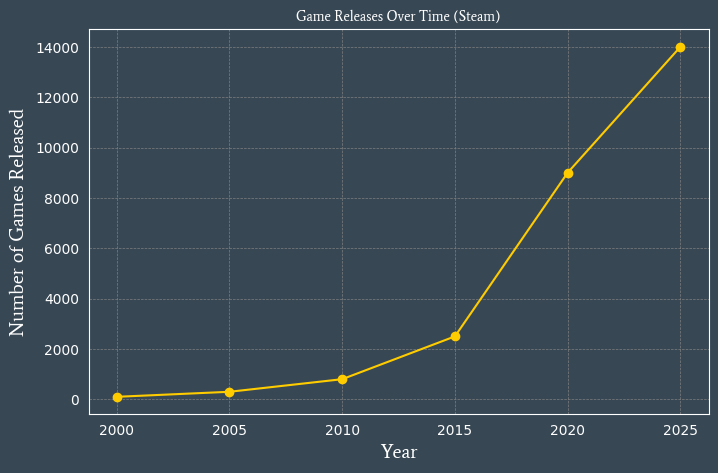

In [159]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# Define font path
font_path = "/usr/share/fonts/truetype/Average-Regular.ttf"

# Load the font
average_font = fm.FontProperties(fname=font_path)

# Apply the font in plots
plt.figure(figsize=(8,5))

# Example plot with correct font usage
plt.plot([2000, 2005, 2010, 2015, 2020, 2025], [100, 300, 800, 2500, 9000, 14000], marker='o', linestyle='-', color="#FFCC00")

# Use fontproperties explicitly in each text element
plt.xlabel("Year", fontsize=14, fontweight="bold", color="white", fontproperties=average_font)
plt.ylabel("Number of Games Released", fontsize=14, fontweight="bold", color="white", fontproperties=average_font)
plt.title("Game Releases Over Time (Steam)", fontsize=16, fontweight="bold", color="white", fontproperties=average_font)

# Apply grid and show plot
plt.grid(True, linestyle="--", linewidth=0.5)
plt.show()



Here we convert the release date column into a proper datetime format, then pull out the year and month into separate columns. This gives us more flexibility for analysis and lets us later calculate things like seasonal trends or yearly release counts.


In [160]:
import pandas as pd

# Ensure the column name matches exactly
df['Release date'] = pd.to_datetime(df['Release date'], format='%b %d, %Y', errors='coerce')

# Extract year and month
df['release_year'] = df['Release date'].dt.year
df['release_month'] = df['Release date'].dt.month

# Display first few rows to verify
df[['Release date', 'release_year', 'release_month']].head()
df.drop(columns=["Release date"])


,AppID,Name,Estimated owners,Peak CCU,Required age,Price,DLC count,About the game,Supported languages,Full audio languages,Reviews,Header image,Website,Support url,Support email,Windows,Mac,Linux,Metacritic score,Metacritic url,User score,Positive,Negative,Score rank,Achievements,Recommendations,Notes,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies,release_year,release_month
0,20200,Galactic Bowling,0 - 20000,0,0,19.99,0,Galactic Bowling is an exaggerated and stylize...,['English'],[],None,https://cdn.akamai.steamstatic.com/steam/apps/...,http://www.galacticbowling.net,None,None,True,False,False,0,None,0,6,11,NaN,30,0,None,0,0,0,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,2008.0,10.0
1,655370,Train Bandit,0 - 20000,0,0,0.99,0,THE LAW!! Looks to be a showdown atop a train....,"['English', 'French', 'Italian', 'German', 'Sp...",[],None,https://cdn.akamai.steamstatic.com/steam/apps/...,http://trainbandit.com,None,support@rustymoyher.com,True,True,False,0,None,0,53,5,NaN,12,0,None,0,0,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,2017.0,10.0
2,1732930,Jolt Project,0 - 20000,0,0,4.99,0,Jolt Project: The army now has a new robotics ...,"['English', 'Portuguese - Brazil']",[],None,https://cdn.akamai.steamstatic.com/steam/apps/...,None,None,ramoncampiaof31@gmail.com,True,False,False,0,None,0,0,0,NaN,0,0,None,0,0,0,0,Campião Games,Campião Games,Single-player,"Action,Adventure,Indie,Strategy",None,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,2021.0,11.0
3,1355720,Henosis™,0 - 20000,0,0,5.99,0,HENOSIS™ is a mysterious 2D Platform Puzzler w...,"['English', 'French', 'Italian', 'German', 'Sp...",[],None,https://cdn.akamai.steamstatic.com/steam/apps/...,https://henosisgame.com/,https://henosisgame.com/,info@henosisgame.com,True,True,True,0,None,0,3,0,NaN,0,0,None,0,0,0,0,Odd Critter Games,Odd Critter Games,"Single-player,Full controller support","Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,2020.0,7.0
4,1139950,Two Weeks in Painland,0 - 20000,0,0,0.00,0,ABOUT THE GAME Play as a hacker who has arrang...,"['English', 'Spanish - Spain']",[],None,https://cdn.akamai.steamstatic.com/steam/apps/...,https://www.unusual-games.com/home/,https://www.unusual-games.com/contact/,welistentoyou@unusual-games.com,True,True,False,0,None,0,50,8,NaN,17,0,This Game may contain content not appropriate ...,0,0,0,0,Unusual Games,Unusual Games,"Single-player,Steam Achievements","Adventure,Indie","Indie,Adventure,Nudity,Violent,Sexual Content,...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,2020.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83555,2591500,Sex Simulator - Office Promotion,0 - 20000,0,0,3.99,0,ABOUT THE GAME A sex simulation game with visu...,['English'],[],None,https://cdn.akamai.steamstatic.com/steam/apps/...,http://www.exosyphen.com,http://www.exosyphen.com,contact@exosyphenstudios.com,True,True,True,0,None,0,0,0,NaN,3,0,The game graphically depicts sex in still imag...,0,0,0,0,EroticGamesClub,EroticGamesClub,"Single-player,Steam Achievements,Steam Leaderb...","Adventure,Casual,Indie",None,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/s

This adds a simple but useful feature, the total number of user reviews for each game gives us a quick sense of overall player engagement or visibility on the platform.

In [161]:
# Create a new column summing both review counts
df['total_reviews'] = df['Positive'] + df['Negative']

# Display first few rows to verify
df[['Positive', 'Negative', 'total_reviews']].head()


,Positive,Negative,total_reviews
0,6,11,17
1,53,5,58
2,0,0,0
3,3,0,3
4,50,8,58


In [162]:
df.head()

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,About the game,Supported languages,Full audio languages,Reviews,Header image,Website,Support url,Support email,Windows,Mac,Linux,Metacritic score,Metacritic url,User score,Positive,Negative,Score rank,Achievements,Recommendations,Notes,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies,release_year,release_month,total_reviews
0,20200,Galactic Bowling,2008-10-21,0 - 20000,0,0,19.99,0,Galactic Bowling is an exaggerated and stylize...,['English'],[],None,https://cdn.akamai.steamstatic.com/steam/apps/...,http://www.galacticbowling.net,None,None,True,False,False,0,None,0,6,11,NaN,30,0,None,0,0,0,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,2008.0,10.0,17
1,655370,Train Bandit,2017-10-12,0 - 20000,0,0,0.99,0,THE LAW!! Looks to be a showdown atop a train....,"['English', 'French', 'Italian', 'German', 'Sp...",[],None,https://cdn.akamai.steamstatic.com/steam/apps/...,http://trainbandit.com,None,support@rustymoyher.com,True,True,False,0,None,0,53,5,NaN,12,0,None,0,0,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,2017.0,10.0,58
2,1732930,Jolt Project,2021-11-17,0 - 20000,0,0,4.99,0,Jolt Project: The army now has a new robotics ...,"['English', 'Portuguese - Brazil']",[],None,https://cdn.akamai.steamstatic.com/steam/apps/...,None,None,ramoncampiaof31@gmail.com,True,False,False,0,None,0,0,0,NaN,0,0,None,0,0,0,0,Campião Games,Campião Games,Single-player,"Action,Adventure,Indie,Strategy",None,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,2021.0,11.0,0
3,1355720,Henosis™,2020-07-23,0 - 20000,0,0,5.99,0,HENOSIS™ is a mysterious 2D Platform Puzzler w...,"['English', 'French', 'Italian', 'German', 'Sp...",[],None,https://cdn.akamai.steamstatic.com/steam/apps/...,https://henosisgame.com/,https://henosisgame.com/,info@henosisgame.com,True,True,True,0,None,0,3,0,NaN,0,0,None,0,0,0,0,Odd Critter Games,Odd Critter Games,"Single-player,Full controller support","Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,2020.0,7.0,3
4,1139950,Two Weeks in Painland,2020-02-03,0 - 20000,0,0,0.00,0,ABOUT THE GAME Play as a hacker who has arrang...,"['English', 'Spanish - Spain']",[],None,https://cdn.akamai.steamstatic.com/steam/apps/...,https://www.unusual-games.com/home/,https://www.unusual-games.com/contact/,welistentoyou@unusual-games.com,True,True,False,0,None,0,50,8,NaN,17,0,This Game may contain content not appropriate ...,0,0,0,0,Unusual Games,Unusual Games,"Single-player,Steam Achievements","Adventure,Indie","Indie,Adventure,Nudity,Violent,Sexual Content,...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,2020.0,2.0,58


Game Releases Over: Time Shows how the number of Steam releases has evolved yearly.

Review Distribution: Uses a log-scale histogram to show how many games receive how many reviews.

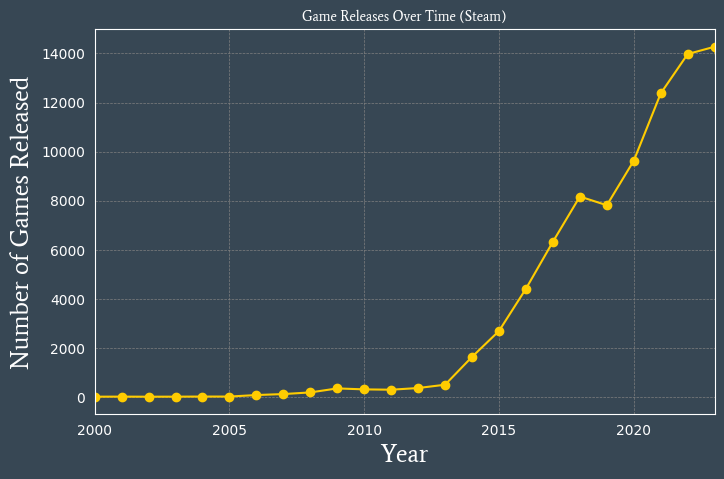

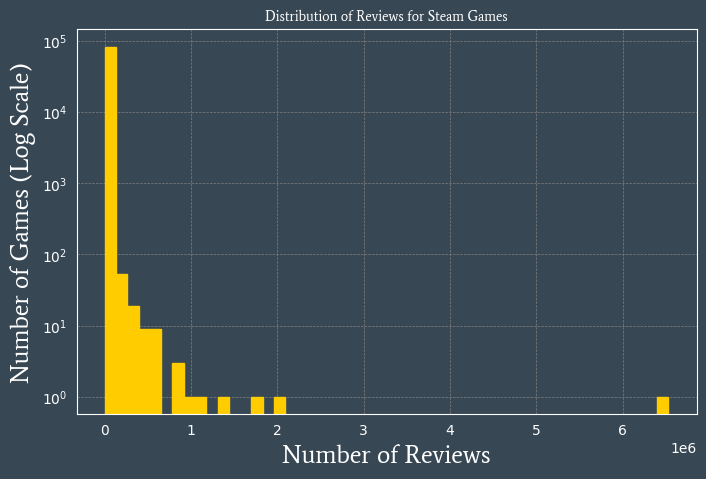

In [163]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.font_manager as fm
import matplotlib.patheffects as pe


# Ensure your dataset is loaded in df
# df = pd.read_csv("your_dataset.csv")  # Uncomment and update if loading from file

# Define custom colors
background_color = "#374754"  # Slightly brighter than slide background
text_color = "white"
highlight_color = "#FFCC00"  # Yellow (matching the hyperlink color)

font_path = "/usr/share/fonts/truetype/Average-Regular.ttf"
average_font = fm.FontProperties(fname=font_path)

# Apply styling globally
plt.rcParams.update({
    "axes.facecolor": background_color,
    "figure.facecolor": background_color,
    "axes.edgecolor": text_color,
    "axes.labelcolor": text_color,
    "xtick.color": text_color,
    "ytick.color": text_color,
    "axes.titlesize": 40,
    "grid.color": "gray",
    "font.family": "Average"
})

### GRAPH 1: Game Releases Over Time ###
df['release_year'] = pd.to_numeric(df['release_year'], errors='coerce')  # Ensure numeric
release_counts = df.groupby('release_year').size()

plt.figure(figsize=(8,5))  # Create the figure first

# Plot the data
plt.plot(release_counts.index, release_counts.values, marker='o', linestyle='-', color=highlight_color, markerfacecolor=highlight_color)

# Set x-axis limit AFTER plotting
plt.xlim(2000, 2023)

plt.xlabel("Year", fontsize=18, fontweight="bold", fontproperties=average_font)
plt.ylabel("Number of Games Released", fontsize=18, fontweight="bold", fontproperties=average_font)
plt.title("Game Releases Over Time (Steam)", fontsize=40, color="white", fontproperties=average_font)
plt.grid(True, linestyle="--", linewidth=0.5)

plt.show()



### GRAPH 2: Distribution of Reviews ###
df['num_reviews'] = pd.to_numeric(df['total_reviews'], errors='coerce')  # Ensure numeric

plt.figure(figsize=(8,5))
plt.hist(df['num_reviews'].dropna(), bins=50, log=True, edgecolor=highlight_color, color=highlight_color)
plt.xlabel("Number of Reviews", fontsize=18, fontweight="bold",fontproperties=average_font)
plt.ylabel("Number of Games (Log Scale)", fontsize=18, fontweight="bold",fontproperties=average_font)
plt.title("Distribution of Reviews for Steam Games", fontsize=40,color ="white",fontproperties=average_font)
plt.grid(True, linestyle="--", linewidth=0.5)

plt.show()



This plot shows the distribution of average playtime across all games. playtime is heavily skewedm, most games are played for very short periods, while a few titles dominate with massive engagement.

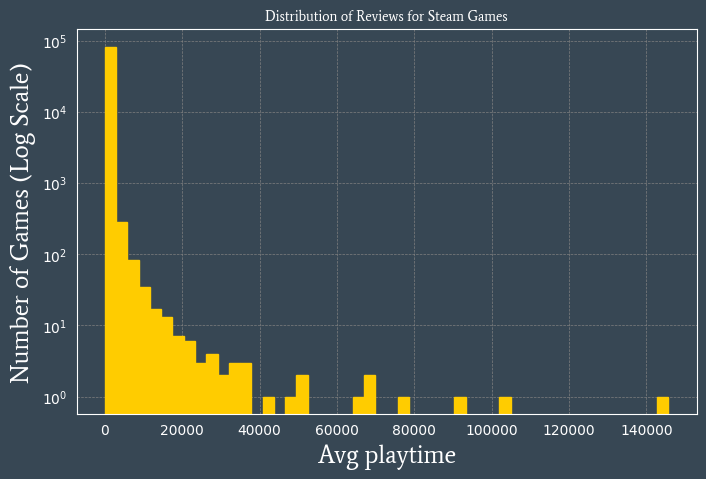

In [164]:

### GRAPH 2: Distribution of Reviews ###

plt.figure(figsize=(8,5))
plt.hist(df['Average playtime forever'].dropna(), bins=50, log=True, edgecolor=highlight_color, color=highlight_color)
plt.xlabel("Avg playtime", fontsize=18, fontweight="bold",fontproperties=average_font)
plt.ylabel("Number of Games (Log Scale)", fontsize=18, fontweight="bold",fontproperties=average_font)
plt.title("Distribution of Reviews for Steam Games", fontsize=40,color ="white",fontproperties=average_font)
plt.grid(True, linestyle="--", linewidth=0.5)

plt.show()


This bar chart breaks down how many games fall into each estimated ownership range.Most games fall into the lower brackets, while only a handful make it into the top ownership ranges, follows along with the review distribution and Avg playimte trends

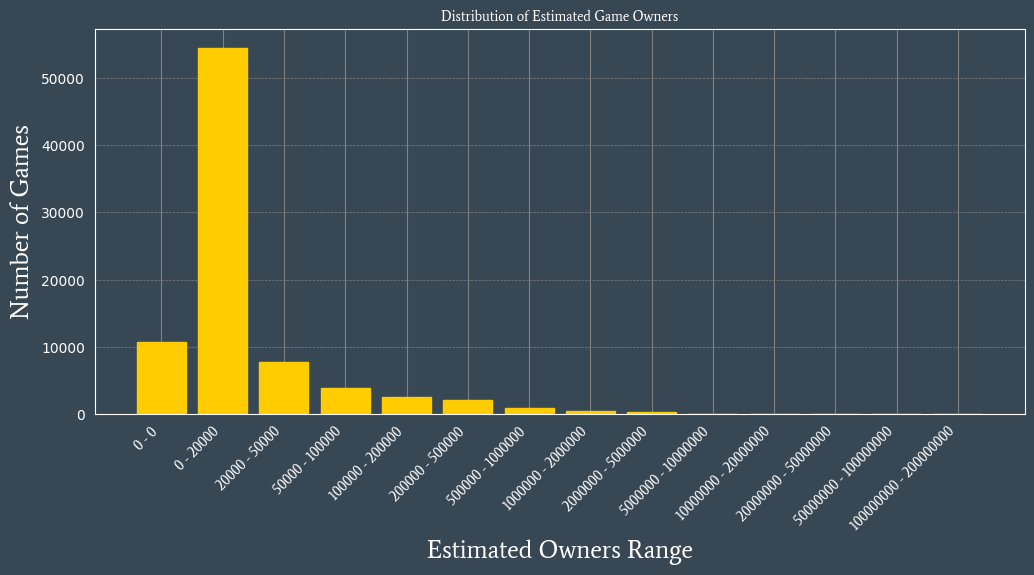

In [165]:
# Count how many games fall into each ownership range
ownership_counts = df['Estimated owners'].value_counts()

# Custom sorting function to extract the numeric start value of each range
def extract_start_value(range_str):
    """Extracts the first numeric value from a range string."""
    return int(range_str.split(" - ")[1].replace(",", ""))  # Remove commas and convert to int

# Sort the index using the extracted numeric values
ownership_counts = ownership_counts.reindex(sorted(ownership_counts.index, key=extract_start_value))

# Create the bar plot
plt.figure(figsize=(12,5))
plt.bar(ownership_counts.index, ownership_counts.values, color=highlight_color, edgecolor=highlight_color)

# Rotate x labels for better readability
plt.xticks(rotation=45, ha="right", fontsize=12, fontproperties=average_font)

# Labels and title
plt.xlabel("Estimated Owners Range", fontsize=18, fontweight="bold", fontproperties=average_font)
plt.ylabel("Number of Games", fontsize=18, fontweight="bold", fontproperties=average_font)
plt.title("Distribution of Estimated Game Owners", fontsize=22, color="white", fontproperties=average_font)

# Grid only on y-axis for a cleaner look
plt.grid(True, linestyle="--", linewidth=0.5, axis="y")

plt.show()



Here we sort and display how many games fall into each estimated owner bracket. We mainly implemented this so we have solid numerical values for our PPts

In [166]:
# Count occurrences of each ownership range

# Custom sorting function to extract the numeric start value of each range
def extract_start_value(range_str):
    """Extracts the first numeric value from a range string."""
    return int(range_str.split(" - ")[1].replace(",", ""))  # Remove commas and convert to int

# Sort the index using the extracted numeric values
ownership_counts = df['Estimated owners'].value_counts().reindex(sorted(df['Estimated owners'].unique()), fill_value=0)

ownership_counts = ownership_counts.reindex(sorted(ownership_counts.index, key=extract_start_value))

# Print the counts in a readable format
print("Estimated Owners Distribution:")
for category, count in ownership_counts.items():
    print(f"{category}: {count} games")

# Optional: Display as a DataFrame for better readability
ownership_df = pd.DataFrame({'Estimated Owners Range': ownership_counts.index, 'Number of Games': ownership_counts.values})



Estimated Owners Distribution:
0 - 0: 10767 games
0 - 20000: 54517 games
20000 - 50000: 7787 games
50000 - 100000: 3877 games
100000 - 200000: 2560 games
200000 - 500000: 2141 games
500000 - 1000000: 906 games
1000000 - 2000000: 521 games
2000000 - 5000000: 329 games
5000000 - 10000000: 91 games
10000000 - 20000000: 38 games
20000000 - 50000000: 21 games
50000000 - 100000000: 4 games
100000000 - 200000000: 1 games


Showing columns with 0 values

In [167]:
zero_counts = {}
zero_percents = {}

for col in df.select_dtypes(include=np.number).columns:
    zero_count = (df[col] == 0).sum()
    zero_percent = round((zero_count / len(df) * 100), 2)
    zero_counts[col] = zero_count
    zero_percents[col] = zero_percent

zeros_info = pd.DataFrame({
    'Zero Count': zero_counts,
    'Zero Percentage': zero_percents
}).sort_values('Zero Percentage', ascending=False)

print(zeros_info[zeros_info['Zero Percentage'] > 0])
suspicious_zero_cols = zeros_info[zeros_info['Zero Percentage'] > 90].index.tolist()
if suspicious_zero_cols:
    print(f"\nSuspicious columns (>90% zeros): {', '.join(suspicious_zero_cols)}")

                            Zero Count  Zero Percentage
User score                       83516            99.95
Required age                     81930            98.05
Average playtime two weeks       81512            97.55
Median playtime two weeks        81512            97.55
Metacritic score                 79650            95.32
DLC count                        71798            85.92
Recommendations                  69837            83.58
Median playtime forever          68656            82.16
Average playtime forever         68656            82.16
Peak CCU                         61189            73.23
Achievements                     42351            50.68
Negative                         32574            38.98
Positive                         22179            26.54
num_reviews                      20053            24.00
total_reviews                    20053            24.00
Price                            16108            19.28

Suspicious columns (>90% zeros): User score, Re

Showing Missing values in data

In [168]:
missing = df.isnull().sum()
missing_percent = (missing / len(df) * 100).round(2)
missing_info = pd.DataFrame({
    'Missing Values': missing,
    'Missing Percentage': missing_percent
}).sort_values('Missing Percentage', ascending=False)

print(missing_info[missing_info['Missing Values'] > 0])
print(f"\nTotal missing values: {missing.sum()}")
print(f"Columns with no missing values: {sum(missing == 0)}")
print(f"Columns with >50% missing values: {sum(missing_percent > 50)}")

                Missing Values  Missing Percentage
Score rank               83516               99.95
Metacritic url           79650               95.32
Reviews                  73844               88.37
Notes                    70845               84.78
Website                  44506               53.26
Support url              42544               50.91
Tags                     19986               23.92
Support email            13319               15.94
Movies                    6300                7.54
Categories                4456                5.33
Publishers                3705                4.43
Developers                3457                4.14
About the game            3437                4.11
Genres                    3425                4.10
Screenshots               1926                2.30
release_month              130                0.16
Release date               130                0.16
release_year               130                0.16
Name                         6 

Quick peek at the top of the dataframe to verify that all the expected columns remain after cleanup

In [ ]:
df.head()

,Name,Estimated owners,Price,DLC count,Supported languages,Reviews,Mac,Linux,Positive,Negative,...,Tag_PCA_16,Tag_PCA_17,Tag_PCA_18,Tag_PCA_19,Tag_PCA_20,Tag_PCA_21,Tag_PCA_22,Tag_PCA_23,Tag_PCA_24,num_reviews
0,Galactic Bowling,10000.0,19.99,0,['English'],NaN,False,False,6,11,...,0.072400,-0.043465,-0.077202,0.074510,0.077114,-0.196392,0.195101,0.036051,0.160528,17
1,Train Bandit,10000.0,0.99,0,"['English', 'French', 'Italian', 'German', 'Sp...",NaN,True,False,53,5,...,0.126947,-0.049636,0.682274,0.157791,0.405382,0.062219,0.291012,-0.176659,0.083788,58
2,Jolt Project,10000.0,4.99,0,"['English', 'Portuguese - Brazil']",NaN,False,False,0,0,...,-0.021247,-0.005293,-0.012540,-0.004986,0.013126,0.005563,-0.007544,0.004975,0.001622,0
3,Henosis™,10000.0,5.99,0,"['English', 'French', 'Italian', 'German', 'Sp...",NaN,True,True,3,0,...,-0.035831,0.477169,-0.329668,0.075434,-0.251955,-0.197122,-0.285523,-0.019795,0.301049,3
4,Two Weeks in Painland,10000.0,0.00,0,"['English', 'Spanish - Spain']",NaN,True,False,50,8,...,0.201464,0.177962,-0.269131,0.215729,0.121299,-0.088192,-0.094722,0.107178,-0.153811,58


Were sampling 10,000 rows here while trying to preserve the skewedd distribution of Average playtime. Binning the playtime first lets us stratify effectively — that way, we avoid accidentally training our proof of concept models only low-playtime games.

In [ ]:
from sklearn.model_selection import train_test_split

# Stratified sampling based on the target variable, binned for skew
df_cleaned['playtime_bin'] = pd.qcut(df_cleaned['Average playtime forever'], q=10, duplicates='drop')

# Take a stratified sample of 10,000 rows
ds, _ = train_test_split(df_cleaned, stratify=df_cleaned['playtime_bin'], train_size=10000, random_state=42)

# Drop the helper bin column
ds = ds.drop(columns=['playtime_bin'])

# Save the sample
ds.to_csv("Sample_cleaned.csv", index=False)


# !!!This will take Over an hour to run!!!

This part of the embedding modelling takes a long time and will bottleneck systems. We Recommend using the finalised call to the dataset near the end of the file before the model calls

Pulling in the DistilBERT tokenizer so we can preprocess text into the format BERT models understand. This will let us convert raw About the game "sentences" into embeddings

In [173]:
# import pandas as pd
# from transformers import DistilBertTokenizer


# # Load DistilBERT tokenizer
# tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased")


We start by filling in any missing descriptions with an empty string to avoid errors. Then we tokenize each "About the game" entry using DistilBERT — this converts the text into a fixed-length sequence of token IDs

In [ ]:
# # Fill missing values with empty string
# df["About the game"] = df["About the game"].fillna("")

# # Tokenization: Convert text into token IDs
# df["Tokenized"] = df["About the game"].apply(lambda x: tokenizer.encode(
#     x, truncation=True, padding="max_length", max_length=512
# ))

# # Display sample tokenized output
# df[["About the game", "Tokenized"]].head()


,About the game,Tokenized
0,Galactic Bowling is an exaggerated and stylize...,"[101, 21375, 9116, 2003, 2019, 16903, 1998, 19..."
1,THE LAW!! Looks to be a showdown atop a train....,"[101, 1996, 2375, 999, 999, 3504, 2000, 2022, ..."
2,Jolt Project: The army now has a new robotics ...,"[101, 22538, 2622, 1024, 1996, 2390, 2085, 203..."
3,HENOSIS™ is a mysterious 2D Platform Puzzler w...,"[101, 21863, 12650, 30108, 2003, 1037, 8075, 1..."
4,ABOUT THE GAME Play as a hacker who has arrang...,"[101, 2055, 1996, 2208, 2377, 2004, 1037, 2330..."


Here we convert the list of tokenized sequences into a PyTorch tensor. This prepares the data for GPU processing and batch feeding into our DistilBERT model.

In [ ]:
# import torch

# # Convert tokenized text into tensor format
# tokens_tensor = torch.tensor(df["Tokenized"].tolist())

# # Verify tensor shape
# tokens_tensor.shape


torch.Size([83560, 512])

We load the pre-trained DistilBERT model and move it to the GPU to speed up the embedding process. We also send our tokenized input to the same device

In [ ]:
# from transformers import DistilBertModel

# # Load DistilBERT model
# model = DistilBertModel.from_pretrained("distilbert-base-uncased")

# # Move model to GPU if available
# device = "cuda" if torch.cuda.is_available() else "cpu"
# model.to(device)
# tokens_tensor = tokens_tensor.to(device)


We batch the tokenized inputs to efficiently generate embeddings using DistilBERT. For each game description, we extract the [CLS] token representation, which captures the overall meaning of the text.

In [ ]:
# import torch
# from tqdm import tqdm

# # Function to process embeddings in batches
# def get_embeddings_in_batches(model, tokens_tensor, batch_size=32):
#     embeddings = []
#     num_samples = tokens_tensor.shape[0]

#     # Loop through in batches
#     for i in tqdm(range(0, num_samples, batch_size)):
#         batch = tokens_tensor[i : i + batch_size].to(device)  # Move batch to GPU

#         with torch.no_grad():
#             outputs = model(batch)
#             batch_embeddings = outputs.last_hidden_state[:, 0, :]  # CLS Token

#         embeddings.append(batch_embeddings.cpu())  # Move back to CPU

#     return torch.cat(embeddings, dim=0)

# # Set batch size (adjust if needed)
# batch_size = 16  # Reduce further if still OOM

# # Get embeddings
# game_embeddings = get_embeddings_in_batches(model, tokens_tensor, batch_size)

# # Verify shape
# game_embeddings.shape  # Should be (num_samples, 768)


100%|██████████| 625/625 [02:26<00:00,  4.26it/s]


torch.Size([10000, 768])

We convert the generated DistilBERT embeddings into a DataFrame and stitch them back into our main dataset as a single column containing vector representations. This gives every game a semantic fingerprint based on its description

In [ ]:
# import pandas as pd
# import numpy as np

# # Convert the embeddings tensor to a NumPy array
# game_embeddings_np = game_embeddings.cpu().numpy()

# # Create a new DataFrame to store embeddings
# embeddings_df = pd.DataFrame(game_embeddings_np)
# embeddings_df.columns = [f'embedding_{i}' for i in range(embeddings_df.shape[1])]

# # Reset index of df_embeddings to match embeddings_df
# df_embeddings = df_embeddings.reset_index(drop=True)

# # Concatenate the embeddings to the original DataFrame
# df_embeddings = pd.concat([df_embeddings, embeddings_df], axis=1)

# # Ensure the number of rows match
# assert df.shape[0] == df_embeddings.shape[0], "Mismatch in row count between dataset and embeddings!"

# # Add embeddings to the original DataFrame by selecting all embedding columns
# df["Embeddings"] = df_embeddings[[f'embedding_{i}' for i in range(embeddings_df.shape[1])]].values.tolist()

# # Verify the updated dataset
# df.head()

,Name,Estimated owners,Price,DLC count,About the game,Supported languages,Reviews,Mac,Linux,Positive,...,Average playtime forever,Developers,Publishers,release_year,release_month,Genres_Vector,Categories_Vector,Tags_Vector,Tokenized,Embeddings
0,Galactic Bowling,0 - 20000,19.99,0,Galactic Bowling is an exaggerated and stylize...,['English'],NaN,False,False,6,...,0,Perpetual FX Creative,Perpetual FX Creative,2008.0,10.0,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[101, 21375, 9116, 2003, 2019, 16903, 1998, 19...","[-0.22279630601406097, -0.2557692229747772, 0...."
1,Train Bandit,0 - 20000,0.99,0,THE LAW!! Looks to be a showdown atop a train....,"['English', 'French', 'Italian', 'German', 'Sp...",NaN,True,False,53,...,0,Rusty Moyher,Wild Rooster,2017.0,10.0,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[101, 1996, 2375, 999, 999, 3504, 2000, 2022, ...","[-0.08699718862771988, -0.19235479831695557, 0..."
2,Jolt Project,0 - 20000,4.99,0,Jolt Project: The army now has a new robotics ...,"['English', 'Portuguese - Brazil']",NaN,False,False,0,...,0,Campião Games,Campião Games,2021.0,11.0,"[0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[101, 22538, 2622, 1024, 1996, 2390, 2085, 203...","[-0.13250991702079773, -0.2451394945383072, 0...."
3,Henosis™,0 - 20000,5.99,0,HENOSIS™ is a mysterious 2D Platform Puzzler w...,"['English', 'French', 'Italian', 'German', 'Sp...",NaN,True,True,3,...,0,Odd Critter Games,Odd Critter Games,2020.0,7.0,"[0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[101, 21863, 12650, 30108, 2003, 1037, 8075, 1...","[-0.15958715975284576, -0.22015132009983063, 0..."
4,Two Weeks in Painland,0 - 20000,0.00,0,ABOUT THE GAME Play as a hacker who has arrang...,"['English', 'Spanish - Spain']",NaN,True,False,50,...,0,Unusual Games,Unusual Games,2020.0,2.0,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[101, 2055, 1996, 2208, 2377, 2004, 1037, 2330...","[-0.1051672026515007, -0.21259693801403046, 0...."


Here we load a saved CSV containing game names and their corresponding DistilBERT embeddings.  mainly used for sharing embeddings with the team

In [ ]:
# import pandas as pd

# # Load the embeddings file
# embedding_df = pd.read_csv("/content/drive/MyDrive/Data Analytics/game_embeddings_and_names.csv")

# # Inspect the first few rows to understand its structure
# embedding_df.head()


,Name,Embeddings
0,Galactic Bowling,"[-0.22279630601406097, -0.2557692229747772, 0...."
1,Train Bandit,"[-0.08699718862771988, -0.19235479831695557, 0..."
2,Jolt Project,"[-0.13250991702079773, -0.2451394945383072, 0...."
3,Henosis™,"[-0.15958715975284576, -0.22015132009983063, 0..."
4,Two Weeks in Painland,"[-0.1051672026515007, -0.21259693801403046, 0...."


Dropping Redundant columns:
Required age – Mostly zeroes, little to no useful variance.

Windows – Nearly every game supports it; offers no signal.

User score – Missing for most entries, not reliable.

Score rank – Often missing, adds noise without context.

Average playtime two weeks – Short-term metric; we use lifetime playtime instead.

Median playtime two weeks – Redundant with average playtime, often zero.

AppID – Just an identifier, not a predictive feature.

Median playtime forever – Average already covers what we need.

Metacritic score – Sparse and inconsistently populated.

Release date – Already decomposed into year and month.

Peak CCU – Highly skewed and redundant with playtime.

Header image – Not relevant to modeling, purely visual.

Website – Irrelevant external link, not useful for predictions.

Support email – Non-informative for game popularity or playtime.

Support url – Same reasoning as support email.

Screenshots – Raw image links, Image processing attempted but was inconsistent, not used in modeling do to adding noise.

Movies – Similar to screenshots, unused multimedia.

Notes – Unstructured and inconsistent, usually empty.

Full audio languages – Dropped in favor of structured language processing.

Metacritic url – External reference, mostly missing.

About the game – Replaced by semantic embeddings elsewhere.

Recommendations – Redundant with review and ownership data.


In [ ]:
# List of columns to remove
columns_to_remove = [
    "Required age",
    "Windows",
    "User score",
    "Score rank",
    "Average playtime two weeks",
    "Median playtime two weeks",
    "AppID",
    "Median playtime forever",
    "Metacritic score",
    "Release date",
    "Peak CCU",
    "Header image",
    "Website",
    "Support email",
    "Support url",
    "Screenshots",
    "Movies",
    "Notes",
    "Full audio languages",
    "Metacritic url",
    "About the game",
    "Recommendations"
]

# Drop the columns
df = df.drop(columns=columns_to_remove)


We merge the saved embeddings back into the main DataFrame using the game name as a key so we dont have to reprocess the text

In [ ]:
# Ensure the 'Name' column is present in both DataFrames
df = pd.merge(df, embedding_df[['Name', 'Embeddings']], on='Name', how='left')

# Verify that the embeddings have been added
df.head()


,Name,Estimated owners,Price,DLC count,Supported languages,Reviews,Mac,Linux,Positive,Negative,...,Average playtime forever,Developers,Publishers,Categories,Genres,Tags,release_year,release_month,total_reviews,Embeddings
0,Galactic Bowling,0 - 20000,19.99,0,['English'],None,False,False,6,11,...,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling",2008.0,10.0,17,"[-0.22279630601406097, -0.2557692229747772, 0...."
1,Train Bandit,0 - 20000,0.99,0,"['English', 'French', 'Italian', 'German', 'Sp...",None,True,False,53,5,...,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",2017.0,10.0,58,"[-0.08699718862771988, -0.19235479831695557, 0..."
2,Jolt Project,0 - 20000,4.99,0,"['English', 'Portuguese - Brazil']",None,False,False,0,0,...,0,Campião Games,Campião Games,Single-player,"Action,Adventure,Indie,Strategy",None,2021.0,11.0,0,"[-0.13250991702079773, -0.2451394945383072, 0...."
3,Henosis™,0 - 20000,5.99,0,"['English', 'French', 'Italian', 'German', 'Sp...",None,True,True,3,0,...,0,Odd Critter Games,Odd Critter Games,"Single-player,Full controller support","Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz...",2020.0,7.0,3,"[-0.15958715975284576, -0.22015132009983063, 0..."
4,Two Weeks in Painland,0 - 20000,0.00,0,"['English', 'Spanish - Spain']",None,True,False,50,8,...,0,Unusual Games,Unusual Games,"Single-player,Steam Achievements","Adventure,Indie","Indie,Adventure,Nudity,Violent,Sexual Content,...",2020.0,2.0,58,"[-0.1051672026515007, -0.21259693801403046, 0...."


We extract the midpoint of the Estimated owners range string to turn it into a single numeric value. This helps make the feature usable for regression models that expect continuous inputs.

In [170]:
import re

# Function to extract midpoint of range
def convert_estimated_owners(value):
    numbers = list(map(int, re.findall(r'\d+', value)))
    if len(numbers) == 2:
        return (numbers[0] + numbers[1]) / 2  # Midpoint
    return numbers[0] if numbers else None  # Single value fallback

# Apply transformation
df["Estimated owners"] = df["Estimated owners"].apply(convert_estimated_owners)

# Verify
df[["Estimated owners"]].head()


,Estimated owners
0,10000.0
1,10000.0
2,10000.0
3,10000.0
4,10000.0


We replace each Developer and Publisher with how often they appear in the dataset. This lets us capture their influence on playtime without creating thousands of one-hot encoded columns.

In [171]:
# Frequency encoding for Developers & Publishers
for col in ["Developers", "Publishers"]:
    freq_map = df[col].value_counts().to_dict()
    df[col] = df[col].map(freq_map)

# Verify
df[["Developers", "Publishers"]].head()


,Developers,Publishers
0,1.0,1.0
1,3.0,4.0
2,1.0,1.0
3,1.0,1.0
4,1.0,1.0


We convert the Genres, Categories, and Tags columns into binary vectors basically, one column for each label representing the presence or absence of each. This allows the model to recognize complex category combinations. We also save the list of unique labels to CSV for future reference.

In [172]:
import numpy as np
import pandas as pd

def multi_hot_encode(df, column_name, save_csv_name):
    """ Converts a multi-label column into a multi-hot encoded vector """
    # Ensure no missing values
    df[column_name] = df[column_name].fillna('Unknown')

    # Convert lists to strings if necessary
    df[column_name] = df[column_name].astype(str)

    # Get a list of all unique values across all rows
    unique_values = sorted(set([item for sublist in df[column_name].str.split(',') for item in sublist]))

    # Create a mapping from value to index
    value_to_index = {value: i for i, value in enumerate(unique_values)}

    # Function to convert list to binary vector
    def value_to_vector(value_list):
        vector = np.zeros(len(unique_values), dtype=int)  # Initialize vector with 0s
        values = value_list.split(',')  # Ensure it's a list
        for value in values:
            if value in value_to_index:
                vector[value_to_index[value]] = 1  # Mark presence as 1
        return list(vector)

    # Apply function to create multi-hot encoded column
    df[column_name + "_Vector"] = df[column_name].apply(value_to_vector)

    # Drop original column
    df.drop(columns=[column_name], inplace=True)

    # Save unique values in order for later reference
    df_unique = pd.DataFrame(unique_values, columns=[column_name])
    df_unique.to_csv(save_csv_name, index=False)

    print(f"Multi-hot encoding completed for '{column_name}' and saved:")
    print(f"- Processed list: {save_csv_name}")

# Apply multi-hot encoding separately to Genres, Categories, and Tags
multi_hot_encode(df, "Genres", "unique_genres.csv")
multi_hot_encode(df, "Categories", "unique_categories.csv")
multi_hot_encode(df, "Tags", "unique_tags.csv")

# Save the final processed dataset
df.to_csv("processed_steam_data.csv", index=False)

# Display confirmation
print("Final dataset saved: processed_steam_data.csv")
df.head()


Multi-hot encoding completed for 'Genres' and saved:
- Processed list: unique_genres.csv
Multi-hot encoding completed for 'Categories' and saved:
- Processed list: unique_categories.csv
Multi-hot encoding completed for 'Tags' and saved:
- Processed list: unique_tags.csv
Final dataset saved: processed_steam_data.csv


,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,About the game,Supported languages,Full audio languages,Reviews,Header image,Website,Support url,Support email,Windows,Mac,Linux,Metacritic score,Metacritic url,User score,Positive,Negative,Score rank,Achievements,Recommendations,Notes,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Screenshots,Movies,release_year,release_month,total_reviews,num_reviews,Genres_Vector,Categories_Vector,Tags_Vector
0,20200,Galactic Bowling,2008-10-21,10000.0,0,0,19.99,0,Galactic Bowling is an exaggerated and stylize...,['English'],[],None,https://cdn.akamai.steamstatic.com/steam/apps/...,http://www.galacticbowling.net,None,None,True,False,False,0,None,0,6,11,NaN,30,0,None,0,0,0,0,1.0,1.0,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,2008.0,10.0,17,17,"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,655370,Train Bandit,2017-10-12,10000.0,0,0,0.99,0,THE LAW!! Looks to be a showdown atop a train....,"['English', 'French', 'Italian', 'German', 'Sp...",[],None,https://cdn.akamai.steamstatic.com/steam/apps/...,http://trainbandit.com,None,support@rustymoyher.com,True,True,False,0,None,0,53,5,NaN,12,0,None,0,0,0,0,3.0,4.0,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,2017.0,10.0,58,58,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,1732930,Jolt Project,2021-11-17,10000.0,0,0,4.99,0,Jolt Project: The army now has a new robotics ...,"['English', 'Portuguese - Brazil']",[],None,https://cdn.akamai.steamstatic.com/steam/apps/...,None,None,ramoncampiaof31@gmail.com,True,False,False,0,None,0,0,0,NaN,0,0,None,0,0,0,0,1.0,1.0,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,2021.0,11.0,0,0,"[0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,1355720,Henosis™,2020-07-23,10000.0,0,0,5.99,0,HENOSIS™ is a mysterious 2D Platform Puzzler w...,"['English', 'French', 'Italian', 'German', 'Sp...",[],None,https://cdn.akamai.steamstatic.com/steam/apps/...,https://henosisgame.com/,https://henosisgame.com/,info@henosisgame.com,True,True,True,0,None,0,3,0,NaN,0,0,None,0,0,0,0,1.0,1.0,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,2020.0,7.0,3,3,"[0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,1139950,Two Weeks in Painland,2020-02-03,10000.0,0,0,0.00,0,ABOUT THE GAME Play as a hacker who has arrang...,"['English', 'Spanish - Spain']",[],None,https://cdn.akamai.steamstatic.com/steam/apps/...,https://www.unusual-games.com/home/,https://www.unusual-games.com/contact/,welistentoyou@unusual-games.com,True,True,False,0,None,0,50,8,NaN,17,0,This Game may contain content not appropriate ...,0,0,0,0,1.0,1.0,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,2020.0,2.0,58,58,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


Importing the processed data back into the Session, used to jump back in where we left off with our work

In [ ]:
import pandas as pd
file_path = "/content/processed_steam_data.csv"  # Adjust path if necessary
df_embeddings = pd.read_csv(file_path)

Getting a representation of the data from the newly imported dataframe.

In [ ]:
df.head()

,Name,Estimated owners,Price,DLC count,Supported languages,Reviews,Mac,Linux,Positive,Negative,...,Average playtime forever,Developers,Publishers,release_year,release_month,total_reviews,Embeddings,Genres_Vector,Categories_Vector,Tags_Vector
0,Galactic Bowling,10000.0,19.99,0,['English'],None,False,False,6,11,...,0,1.0,1.0,2008.0,10.0,17,"[-0.22279630601406097, -0.2557692229747772, 0....","[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,Train Bandit,10000.0,0.99,0,"['English', 'French', 'Italian', 'German', 'Sp...",None,True,False,53,5,...,0,3.0,4.0,2017.0,10.0,58,"[-0.08699718862771988, -0.19235479831695557, 0...","[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,Jolt Project,10000.0,4.99,0,"['English', 'Portuguese - Brazil']",None,False,False,0,0,...,0,1.0,1.0,2021.0,11.0,0,"[-0.13250991702079773, -0.2451394945383072, 0....","[0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,Henosis™,10000.0,5.99,0,"['English', 'French', 'Italian', 'German', 'Sp...",None,True,True,3,0,...,0,1.0,1.0,2020.0,7.0,3,"[-0.15958715975284576, -0.22015132009983063, 0...","[0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,Two Weeks in Painland,10000.0,0.00,0,"['English', 'Spanish - Spain']",None,True,False,50,8,...,0,1.0,1.0,2020.0,2.0,58,"[-0.1051672026515007, -0.21259693801403046, 0....","[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


Missing values in the "Reviews" column indicate no reviews were left. Filling with 0 preserves that meaning and avoids introducing noise from imputation.

In [ ]:
# Fill NaN values in "Reviews" column with 0
df["Reviews"] = df["Reviews"].fillna(0)

We convert the Supported languages column into a multi-hot encoded vector. Each language becomes its own binary feature, allowing the model to learn patterns about language support across games.

In [ ]:
import numpy as np
import pandas as pd

def multi_hot_encode(df, column_name, save_csv_name):
    """ Converts a multi-label column into a multi-hot encoded vector """
    # Ensure no missing values
    df[column_name] = df[column_name].fillna('Unknown')

    # Convert lists to strings if necessary
    df[column_name] = df[column_name].astype(str)

    # Get a list of all unique values across all rows
    unique_values = sorted(set([item for sublist in df[column_name].str.split(',') for item in sublist]))

    # Create a mapping from value to index
    value_to_index = {value: i for i, value in enumerate(unique_values)}

    # Function to convert list to binary vector
    def value_to_vector(value_list):
        vector = np.zeros(len(unique_values), dtype=int)  # Initialize vector with 0s
        values = value_list.split(',')  # Ensure it's a list
        for value in values:
            if value in value_to_index:
                vector[value_to_index[value]] = 1  # Mark presence as 1
        return list(vector)

    # Apply function to create multi-hot encoded column
    df[column_name + "_Vector"] = df[column_name].apply(value_to_vector)

    # Drop original column
    df.drop(columns=[column_name], inplace=True)

    # Save unique values in order for later reference
    df_unique = pd.DataFrame(unique_values, columns=[column_name])
    df_unique.to_csv(save_csv_name, index=False)

    print(f"Multi-hot encoding completed for '{column_name}' and saved:")
    print(f"- Processed list: {save_csv_name}")

# Apply multi-hot encoding separately to Genres, Categories, and Tags
multi_hot_encode(df, "Supported languages", "Unique_Supported_languages.csv")

# Save the final processed dataset
df.to_csv("processed_steam_data.csv", index=False)

# Display confirmation
print("Final dataset saved: processed_steam_data.csv")
df.head()

Multi-hot encoding completed for 'Supported languages' and saved:
- Processed list: Unique_Supported_languages.csv
Final dataset saved: processed_steam_data.csv


,Name,Estimated owners,Price,DLC count,Reviews,Mac,Linux,Positive,Negative,Achievements,...,Embedding_PC17,Embedding_PC18,Embedding_PC19,Embedding_PC20,Embedding_PC21,Embedding_PC22,Embedding_PC23,Embedding_PC24,Embedding_PC25,Supported languages_Vector
0,Galactic Bowling,10000.0,19.99,0,NaN,False,False,6,11,30,...,-0.051349,-0.077195,0.076593,0.229033,-0.035678,0.032422,-0.113405,-0.089039,-0.033500,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,Train Bandit,10000.0,0.99,0,NaN,True,False,53,5,12,...,0.070397,0.156394,-0.244397,0.145121,-0.046639,-0.192340,-0.008534,0.075483,-0.075568,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,Jolt Project,10000.0,4.99,0,NaN,False,False,0,0,0,...,0.174079,0.065857,-0.042354,-0.142059,-0.108316,-0.019729,0.132233,-0.124009,0.159758,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,Henosis™,10000.0,5.99,0,NaN,True,True,3,0,0,...,0.092391,0.076990,0.010519,-0.119435,-0.086169,-0.002072,0.066211,0.127998,0.046663,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,Two Weeks in Painland,10000.0,0.00,0,NaN,True,False,50,8,17,...,0.185694,0.079373,-0.269639,0.104303,-0.075959,-0.076847,-0.090975,0.027350,0.013486,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


After preprocessing and integration, we save the cleaned and feature-rich dataset to another CSV file.

In [ ]:
# Save the final processed dataset
df.to_csv("RDY_Steam_data_with_Embeddings.csv", index=False)

# Display confirmation
print("Final dataset saved: processed_steam_data.csv")
df.head()

Final dataset saved: processed_steam_data.csv


,Name,Estimated owners,Price,DLC count,Reviews,Mac,Linux,Positive,Negative,Achievements,...,Average playtime forever,Developers,Publishers,release_year,release_month,Genres_Vector,Categories_Vector,Tags_Vector,Embeddings,Supported languages_Vector
0,Galactic Bowling,10000.0,19.99,0,0,False,False,6,11,30,...,0,1.0,1.0,2008.0,10.0,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[-0.22279630601406097, -0.2557692229747772, 0....","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,Train Bandit,10000.0,0.99,0,0,True,False,53,5,12,...,0,1.0,2.0,2017.0,10.0,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[-0.08699718862771988, -0.19235479831695557, 0...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ..."
2,Jolt Project,10000.0,4.99,0,0,False,False,0,0,0,...,0,1.0,1.0,2021.0,11.0,"[0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[-0.13250991702079773, -0.2451394945383072, 0....","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,Henosis™,10000.0,5.99,0,0,True,True,3,0,0,...,0,1.0,1.0,2020.0,7.0,"[0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[-0.15958715975284576, -0.22015132009983063, 0...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ..."
4,Two Weeks in Painland,10000.0,0.00,0,0,True,False,50,8,17,...,0,1.0,1.0,2020.0,2.0,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[-0.1051672026515007, -0.21259693801403046, 0....","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


Here we extract just the "Name" and "Embeddings" columns and save them to their own CSV file.

In [ ]:
# Extract only "Name" and "Embeddings" columns
df_embeddings = df[["Name", "Embeddings"]]

# Save to CSV
df_embeddings.to_csv("game_embeddings_and_names.csv", index=False)

# Display confirmation
print("✅ Game embeddings saved!")
print("📄 Saved file: game_embeddings.csv")

# Show sample output
df_embeddings.head()


✅ Game embeddings saved!
📄 Saved file: game_embeddings.csv


,Name,Embeddings
0,Galactic Bowling,"[-0.22279630601406097, -0.2557692229747772, 0...."
1,Train Bandit,"[-0.08699718862771988, -0.19235479831695557, 0..."
2,Jolt Project,"[-0.13250991702079773, -0.2451394945383072, 0...."
3,Henosis™,"[-0.15958715975284576, -0.22015132009983063, 0..."
4,Two Weeks in Painland,"[-0.1051672026515007, -0.21259693801403046, 0...."


We import all the core libraries we'll need:

NumPy and Pandas for data handling TensorFlow/Keras for building neural networks, and train_test_split from sklearn to split our dataset into training and testing sets.

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Dense, Concatenate
from sklearn.model_selection import train_test_split


we print the first few rows of our DataFrame and check the datatypes This helps verify everything looks as expected

In [ ]:
import ast


# Inspect first few rows
print(df.head())
print(df.dtypes)


                    Name  Estimated owners  Price  DLC count Reviews    Mac  \
0       Galactic Bowling           10000.0  19.99          0       0  False   
1           Train Bandit           10000.0   0.99          0       0   True   
2           Jolt Project           10000.0   4.99          0       0  False   
3               Henosis™           10000.0   5.99          0       0   True   
4  Two Weeks in Painland           10000.0   0.00          0       0   True   

   Linux  Positive  Negative  Achievements  ...  Developers  Publishers  \
0  False         6        11            30  ...         1.0         1.0   
1  False        53         5            12  ...         3.0         4.0   
2  False         0         0             0  ...         1.0         1.0   
3   True         3         0             0  ...         1.0         1.0   
4  False        50         8            17  ...         1.0         1.0   

   release_year  release_month  total_reviews  \
0        2008.0          

Many of our columns ike Genres_Vector and Embeddings are currently stored as strings that represent lists.
This cell safely converts them into actual NumPy arrays so they can be worked with

In [ ]:
import ast
# List of columns that are stored as lists or strings that need to be expanded
vector_columns = ["Genres_Vector", "Categories_Vector", "Tags_Vector", "Supported languages_Vector", "Embeddings"]

# Function to safely convert list-like strings into actual lists
def convert_to_array(column):
    return column.apply(lambda x: np.array(ast.literal_eval(x), dtype=np.float32) if isinstance(x, str) else np.array(x, dtype=np.float32))

# Convert all vector columns
for col in vector_columns:
    df[col] = convert_to_array(df[col])

# Verify conversion
print(df.dtypes)
print(f"Sample vector shape (Genres_Vector): {df['Genres_Vector'].iloc[0].shape}")
print(f"Sample vector shape (Embeddings): {df['Embeddings'].iloc[0].shape}")


Name                           object
Estimated owners              float64
Price                         float64
DLC count                       int64
Reviews                        object
Mac                              bool
Linux                            bool
Positive                        int64
Negative                        int64
Achievements                    int64
Average playtime forever        int64
Developers                    float64
Publishers                    float64
release_year                  float64
release_month                 float64
total_reviews                   int64
Embeddings                     object
Genres_Vector                  object
Categories_Vector              object
Tags_Vector                    object
Supported languages_Vector     object
dtype: object
Sample vector shape (Genres_Vector): (34,)
Sample vector shape (Embeddings): (768,)


To make our vector-based columns like Embeddings usable in traditional ML models, we break them apart into individual numeric features. Each value in the vector becomes its own column — e.g., Embeddings_0, Embeddings_1, ...

In [ ]:
import pandas as pd

# List of vector columns to expand
vector_columns = ['Embeddings', 'Genres_Vector', 'Categories_Vector', 'Tags_Vector']

# Dictionary to store expanded DataFrames
expanded_columns = {}

for col in vector_columns:
    # Determine number of dimensions
    dim = len(df[col].iloc[0])
    new_col_names = [f"{col}_{i}" for i in range(dim)]

    # Expand each list into a DataFrame
    expanded_columns[col] = pd.DataFrame(df[col].tolist(), columns=new_col_names)

# Combine expanded features with original DataFrame (drop old vector columns)
df_expanded = pd.concat([df.drop(columns=vector_columns)] + list(expanded_columns.values()), axis=1)

# Optional: Save or inspect
print(f"Original shape: {df.shape}, Expanded shape: {df_expanded.shape}")
df_expanded.head()


In [ ]:
# Expand vector columns into separate features
expanded_columns = {}

for col in vector_columns:
    if col == "Embeddings":  # Special case: Embeddings have 768 dimensions
        dim = 768
    else:  # Other vectors have variable dimensions (multi-hot encoded)
        dim = len(df_expanded[col].iloc[0])

    # Create column names
    new_col_names = [f"{col}_{i}" for i in range(dim)]

    # Expand each vector into its respective columns
    expanded_columns[col] = pd.DataFrame(df_expanded[col].tolist(), columns=new_col_names)

# Concatenate expanded columns back into the dataset
df_expanded = pd.concat([df_expanded.drop(columns=vector_columns), *expanded_columns.values()], axis=1)

# Verify shape
print(f"Original shape: {df_expanded.shape}, Expanded shape: {df_expanded.shape}")
df_expanded.head()


Original shape: (85618, 21), Expanded shape: (85618, 1569)


,Name,Estimated owners,Price,DLC count,Reviews,Mac,Linux,Positive,Negative,Achievements,...,Embeddings_758,Embeddings_759,Embeddings_760,Embeddings_761,Embeddings_762,Embeddings_763,Embeddings_764,Embeddings_765,Embeddings_766,Embeddings_767
0,Galactic Bowling,10000.0,19.99,0,0,False,False,6,11,30,...,0.179545,-0.419652,-0.010509,-0.037966,0.360055,-0.162943,-0.015144,0.011363,0.714011,0.130999
1,Train Bandit,10000.0,0.99,0,0,True,False,53,5,12,...,0.237179,-0.189008,0.073082,-0.012216,0.306634,-0.138362,-0.076133,0.117870,0.711768,-0.139562
2,Jolt Project,10000.0,4.99,0,0,False,False,0,0,0,...,0.198489,-0.197832,0.034026,-0.025304,0.359949,-0.091896,-0.049657,0.074515,0.723433,-0.029802
3,Henosis™,10000.0,5.99,0,0,True,True,3,0,0,...,0.285088,-0.129097,0.088892,0.002245,0.332401,-0.099952,-0.065679,0.154261,0.737883,-0.080702
4,Two Weeks in Painland,10000.0,0.00,0,0,True,False,50,8,17,...,0.208251,-0.294584,-0.007781,0.067987,0.364767,-0.130304,-0.046776,0.059537,0.684573,0.025155


We save our fully preprocessed and expanded dataset to Google Drive.

In [ ]:
df.to_csv("/content/drive/MyDrive/Data Analytics/Project/24-03-2025-PCA-Steam-Dataset.csv", index=False)
print(" Expanded dataset saved as 24-03-2025-PCA-Steam-Dataset.csv")


✅ Expanded dataset saved as 24-03-2025-PCA-Steam-Dataset.csv


Import back the Dataset for use when we log back in

In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Data Analytics/Project/Final_RDY_Steam_data_Expanded.csv")

We load the list of original tag names from the  CSV file and create a  dictionary to map our generic tag columns Tags_Vector_0, Tags_Vector_1, .. to meaningful names like "Action", "RPG", etc. This makes the features more interpretable and ouur model explainability

In [ ]:


# Load tag names
tag_names_df = pd.read_csv('/content/unique_tags.csv')
# Create renaming dictionary
rename_dict = {f"Tags_Vector_{i}": tag for i, tag in enumerate(tag_names_df['Tags'])}

# Preview renaming dictionary
print(list(rename_dict.items())[:5])


[('Tags_Vector_0', '1980s'), ('Tags_Vector_1', "1990's"), ('Tags_Vector_2', '2.5D'), ('Tags_Vector_3', '2D'), ('Tags_Vector_4', '2D Fighter')]


We apply the renaming dictionary to the DataFrame to replace generic Tags_Vector_ column names with their actual tag labels from the unique_tags.csv.

In [ ]:
# Rename the tag columns
df.rename(columns=rename_dict, inplace=True)


We generate a new column called tag_sentence by combining all tag columns with a value of 1 into a single space-separated string. This allows us to treat each game's tags like a sentence

In [ ]:
# Get the actual tag column names (after renaming)
tag_columns = list(rename_dict.values())

# Create a new column 'tag_sentence' where each game gets its tags joined as a space-separated string
df['tag_sentence'] = df[tag_columns].apply(lambda row: ' '.join(tag for tag, val in row.items() if val == 1), axis=1)

# Preview a few tag sentences
df[['Name', 'tag_sentence']].head()


,Name,tag_sentence
0,Galactic Bowling,Bowling Casual Indie Sports
1,Train Bandit,2D Action Arcade Blood Casual Comedy Controlle...
2,Jolt Project,Utilities
3,Henosis™,2D 2D Platformer Adventure Atmospheric Casual ...
4,Two Weeks in Painland,Adventure Indie Nudity Sexual Content Story Ri...


# !!!This will take Over an hour to run!!!

This part of the embedding modelling takes a long time and will bottleneck systems. We Recommend using the finalised call to the dataset near the end of the file before the model calls

We use a pre-trained DistilBERT model to transform each game's tag_sentence into a 768-dimensional embedding. This approach helps capture relationships between tags in a way that simple binary vectors can't.

In [ ]:
# from transformers import DistilBertTokenizer, DistilBertModel
# import torch
# import numpy as np # Import numpy

# # Load pretrained DistilBERT
# tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased")
# model = DistilBertModel.from_pretrained("distilbert-base-uncased")
# model.eval()  # inference mode

# # Function to get [CLS] token embedding
# def get_embedding(text):
#     inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=64)
#     with torch.no_grad():
#         outputs = model(**inputs)
#     cls_embedding = outputs.last_hidden_state[:, 0, :]  # [batch_size, hidden_size]
#     return cls_embedding.squeeze().numpy()  # shape: (768,)

# # Apply to your dataframe
# from tqdm import tqdm
# tag_embeddings = np.vstack([get_embedding(text) for text in tqdm(df['tag_sentence'])])


100%|██████████| 97714/97714 [1:33:45<00:00, 17.37it/s]


We perform Principal Component Analysis (PCA) on the 768-dimensional DistilBERT tag embeddings to reduce dimensionality while preserving as much information as possible

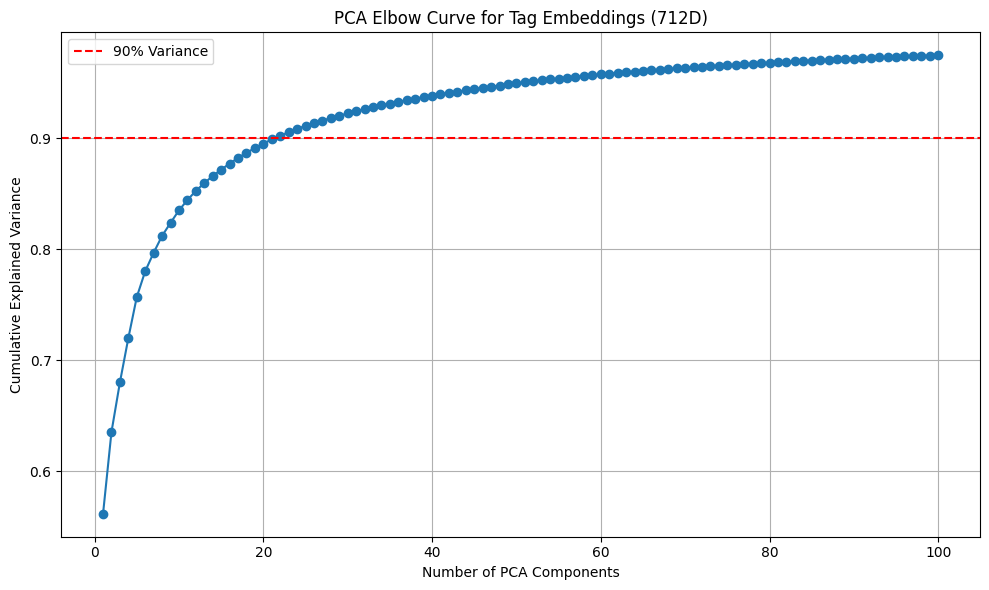

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Assuming tag_embeddings_712 is your (n_samples, 712) numpy array
pca_full = PCA(n_components=100, svd_solver='randomized', random_state=42)
pca_full.fit(tag_embeddings)

# Elbow Curve
cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o')
plt.axhline(y=0.90, color='r', linestyle='--', label='90% Variance')
plt.xlabel("Number of PCA Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA Elbow Curve for Tag Embeddings (712D)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


After reviewing the Elbow Curve, we reduce our tag embeddings to 25 dimensions using PCA. This gives us a compact version of the tag vectors that still captures most of their original structure

In [ ]:
# Apply PCA to get 50D embedding
pca_50 = PCA(n_components=25, svd_solver='randomized', random_state=42)
reduced_embeddings = pca_50.fit_transform(tag_embeddings)


We create a new DataFrame from our 25-dimensional PCA tag embeddings and join it back to our main dataset.

In [ ]:
# Create column names for PCA embeddings
pca_cols = [f"Tag_PCA_{i}" for i in range(25)]

# Create DataFrame and merge with original df
df_pca = pd.DataFrame(reduced_embeddings, columns=pca_cols, index=df.index)
df_final = pd.concat([df, df_pca], axis=1)


We save the cleaned, enriched dataset to a CSV file with today’s date in the filename for version tracking. This version includes our newly reduced tag embeddings

In [ ]:
from datetime import datetime

# Build filename with current date
today = datetime.today().strftime('%Y-%m-%d')
filename = f"steam_df_with_tag_embeddings_PCA50_{today}.csv"

# Save to CSV
df_final.to_csv(filename, index=False)
print(f"✅ Saved final DataFrame to: {filename}")


✅ Saved final DataFrame to: steam_df_with_tag_embeddings_PCA50_2025-04-11.csv


Importing the Last CSV we used again to pick up when we need

In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/steam_df_with_tag_embeddings_PCA50_2025-04-11.csv")

In [ ]:
df.head()

,Name,Estimated owners,Price,DLC count,Supported languages,Reviews,Mac,Linux,Positive,Negative,...,Tag_PCA_15,Tag_PCA_16,Tag_PCA_17,Tag_PCA_18,Tag_PCA_19,Tag_PCA_20,Tag_PCA_21,Tag_PCA_22,Tag_PCA_23,Tag_PCA_24
0,Galactic Bowling,10000.0,19.99,0,['English'],NaN,False,False,6,11,...,-0.284221,0.072400,-0.043465,-0.077202,0.074510,0.077114,-0.196392,0.195101,0.036051,0.160528
1,Train Bandit,10000.0,0.99,0,"['English', 'French', 'Italian', 'German', 'Sp...",NaN,True,False,53,5,...,-0.161443,0.126947,-0.049636,0.682274,0.157791,0.405382,0.062219,0.291012,-0.176659,0.083788
2,Jolt Project,10000.0,4.99,0,"['English', 'Portuguese - Brazil']",NaN,False,False,0,0,...,0.029643,-0.021247,-0.005293,-0.012540,-0.004986,0.013126,0.005563,-0.007544,0.004975,0.001622
3,Henosis™,10000.0,5.99,0,"['English', 'French', 'Italian', 'German', 'Sp...",NaN,True,True,3,0,...,-0.245081,-0.035831,0.477169,-0.329668,0.075434,-0.251955,-0.197122,-0.285523,-0.019795,0.301049
4,Two Weeks in Painland,10000.0,0.00,0,"['English', 'Spanish - Spain']",NaN,True,False,50,8,...,0.016745,0.201464,0.177962,-0.269131,0.215729,0.121299,-0.088192,-0.094722,0.107178,-0.153811


Here we use cosine similarity to compare the PCA-reduced tag embeddings between three games. The idea is to see if similar games like two Call of Duty agmes have more semantically similar vectors than unrelated ones like Call of Duty and Stardew Valley. This helps validate whether our tag embeddings are capturing meaningful genre/category relationships.

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# 1. Get the PCA embedding column names
pca_cols = [col for col in df.columns if col.startswith("Tag_PCA_")]

# 2. Define your game names
game1 = "Call of Duty® 4: Modern Warfare®"
game2 = "Call of Duty®: Black Ops"
game3 = "Stardew Valley"

# 3. Extract their PCA embeddings
vec1 = df.loc[df["Name"] == game1, pca_cols].values
vec2 = df.loc[df["Name"] == game2, pca_cols].values
vec3 = df.loc[df["Name"] == game3, pca_cols].values

# 4. Compute cosine similarities
sim_cod_cod = cosine_similarity(vec1, vec2)[0][0]
sim_cod_stardew = cosine_similarity(vec1, vec3)[0][0]

# 5. Print results
print(f" Cosine similarity between '{game1}' and '{game2}': {sim_cod_cod:.4f}")
print(f" Cosine similarity between '{game1}' and '{game3}': {sim_cod_stardew:.4f}")


 Cosine similarity between 'Call of Duty® 4: Modern Warfare®' and 'Call of Duty®: Black Ops': 0.8298
 Cosine similarity between 'Call of Duty® 4: Modern Warfare®' and 'Stardew Valley': 0.5861


Here we take the reduced tag embeddings from PCA and run a second PCA to bring them down to 3 dimensions, just for visualisation. By plotting three games in this 3D space Modern Warfare, Black Ops II, and Stardew Valley we can see how close or far apart they are based on their semantic tags. If the embeddings worked well, similar games should cluster together, and vastly different games like Stardew should sit further away as we do find, ON PC1 Clearly Stardew is very different from the call of duty games

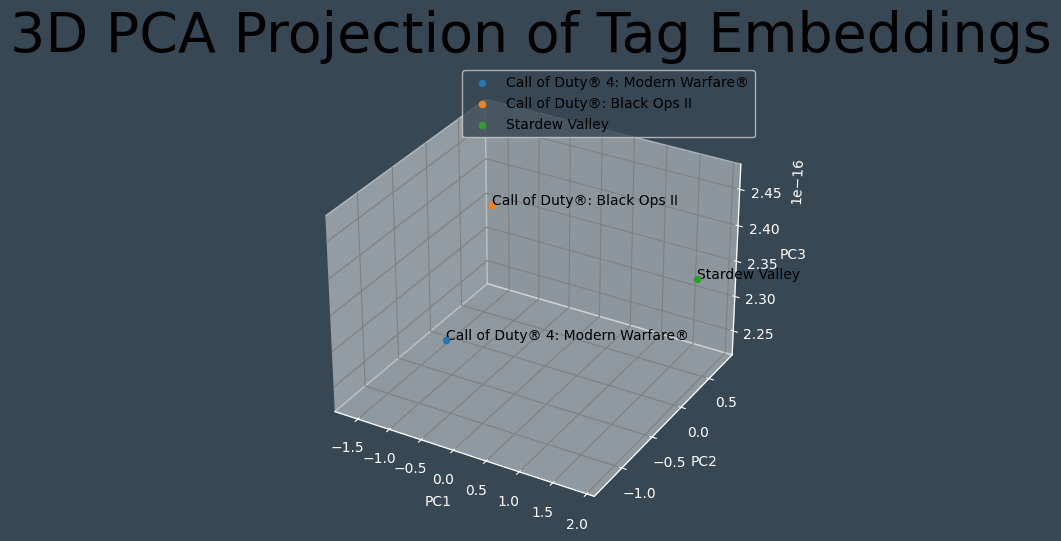

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

# Step 1: Define the games you're interested in
games_to_plot = ["Call of Duty® 4: Modern Warfare®", "Call of Duty®: Black Ops II", "Stardew Valley"]

# Step 2: Get the embedding columns (assuming your tag PCA embeddings are named like "Tag_Embed_X")
embedding_cols = [col for col in df.columns if col.startswith("Tag_PCA_")]

# Step 3: Filter the DataFrame
df_subset = df[df['Name'].isin(games_to_plot)].copy()

# Step 4: Run PCA to reduce to 3D
pca = PCA(n_components=3)
pca_components = pca.fit_transform(df_subset[embedding_cols])

# Step 5: Plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

for i, game in enumerate(df_subset['Name']):
    ax.scatter(pca_components[i, 0], pca_components[i, 1], pca_components[i, 2], label=game)
    ax.text(pca_components[i, 0], pca_components[i, 1], pca_components[i, 2], game, size=10)

ax.set_title("3D PCA Projection of Tag Embeddings")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
plt.legend()
plt.show()


We grab all columns that start with "Tags_", which represent our one-hot encoded tag data.

In [ ]:
tag_cols = [col for col in df.columns if col.startswith("Tags_")]
tag_matrix = df[tag_cols].values


We train a basic autoencoder to compress the high-dimensional binary tag matrix into a dense 100-dimensional representation. This bottleneck layer captures the underlying structure of tag co-occurrence, learning which games are semantically similar based on their tag patterns.

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

input_dim = tag_matrix.shape[1]
encoding_dim = 100

input_layer = Input(shape=(input_dim,))
encoded = Dense(128, activation='relu')(input_layer)
encoded = Dense(64, activation='relu')(encoded)
bottleneck = Dense(encoding_dim, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(bottleneck)
decoded = Dense(128, activation='relu')(decoded)
output_layer = Dense(input_dim, activation='sigmoid')(decoded)

autoencoder = Model(input_layer, output_layer)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train
autoencoder.fit(tag_matrix, tag_matrix, epochs=100, batch_size=256, validation_split=0.1)

# Extract embeddings
encoder = Model(input_layer, bottleneck)
tag_embeddings = encoder.predict(tag_matrix)


Epoch 1/100
344/344 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - loss: 0.2013 - val_loss: 0.0497
Epoch 2/100
344/344 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0479 - val_loss: 0.0370
Epoch 3/100
344/344 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0364 - val_loss: 0.0317
Epoch 4/100
344/344 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0308 - val_loss: 0.0283
Epoch 5/100
344/344 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0270 - val_loss: 0.0260
Epoch 6/100
344/344 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0246 - val_loss: 0.0245
Epoch 7/100
344/344 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0228 - val_loss: 0.0230
Epoch 8/100
344/344 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0212 - val_loss: 0.0219
Epoch 9/100
344/344 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0199 - val_loss: 0.0208
Epoch 10/100
344/344 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0187 - val_loss: 0.0201
Epoch 11/100
344/344 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0179 - val_loss: 0.0192
Epoch 12/100
344/344 ━━━━━━━━━━━━━━━━━━━

We remove the original binary tag columns and replace them with the compressed tag embeddings learned by our autoencoder. These new vectors retain the semantic similarity between games while drastically reducing dimensionality

In [ ]:
# 1. Get all original tag columns
tag_cols = [col for col in df.columns if col.startswith("Tags_")]

# 2. Encode the tag vectors using your trained encoder
# Assuming you have a separate matrix of just tag columns:
tags_matrix = df[tag_cols].values
tag_embeddings = encoder.predict(tags_matrix)

# 3. Drop the original tag columns
df = df.drop(columns=tag_cols)

# 4. Add the new embedding columns back to the DataFrame
embedding_dim = tag_embeddings.shape[1]
embedding_cols = [f"Tag_Embed_{i}" for i in range(embedding_dim)]

df_embeddings = pd.DataFrame(tag_embeddings, columns=embedding_cols, index=df.index)
df = pd.concat([df, df_embeddings], axis=1)

print(" Replaced original tag vectors with reduced embeddings")


3054/3054 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
✅ Replaced original tag vectors with reduced embeddings


We isolate all games with titles containing "Call of Duty" using a case-insensitive string match on the Name column. We mainly used this to get exact name titles to check the similarity between games

In [ ]:
df[df['Name'].str.contains("Call Of Duty", case=False, na=False)]


,Name,Estimated owners,Price,DLC count,Supported languages,Reviews,Mac,Linux,Positive,Negative,...,Tag_PCA_15,Tag_PCA_16,Tag_PCA_17,Tag_PCA_18,Tag_PCA_19,Tag_PCA_20,Tag_PCA_21,Tag_PCA_22,Tag_PCA_23,Tag_PCA_24
136,Call of Duty® 4: Modern Warfare®,1500000.0,9.99,0,"['English', 'French', 'German', 'Italian', 'Sp...",Winner of more than 40 E3 2007 awards : Editor...,True,False,16788,1211,...,0.121211,0.078906,-0.426194,0.590352,-0.220682,-0.102032,0.158628,-0.016812,-0.003241,-0.155018
3071,Call of Duty®: Black Ops,3500000.0,19.99,4,"['English', 'German', 'Italian', 'Spanish - Sp...",NaN,False,False,15124,2010,...,0.082653,0.048286,-0.051492,0.141944,0.053349,0.092933,0.443105,0.138846,0.063348,-0.213373
7620,Call of Duty®: Modern Warfare® Remastered,750000.0,19.99,1,"['English', 'French', 'Italian', 'German', 'Sp...",NaN,False,False,4304,2361,...,-0.124521,-0.188254,-0.476596,0.289399,0.035571,-0.051745,0.269797,0.343620,0.054412,-0.270226
8165,Call of Duty®: Black Ops II,3500000.0,19.79,36,"['English', 'French', 'German', 'Italian', 'Sp...",NaN,False,False,27100,4790,...,0.116895,-0.060995,0.002319,-0.000032,-0.271493,0.367842,0.259634,-0.048811,-0.119232,-0.075482
15088,Call of Duty®: Black Ops III,3500000.0,59.99,10,"['English', 'French', 'Italian', 'German', 'Sp...",NaN,True,False,112104,27418,...,0.250046,-0.215141,-0.207213,0.129588,-0.320890,0.075916,0.267427,0.361852,-0.095228,-0.234938
16400,Call of Duty®: Ghosts,1500000.0,59.99,51,"['English', 'French', 'German', 'Italian', 'Sp...",NaN,False,False,17030,10793,...,-0.027234,-0.157391,0.171823,-0.004155,0.021202,0.363670,0.445893,-0.028425,0.234613,-0.157777
20751,Call of Duty: United Offensive,150000.0,19.99,0,"['English', 'French', 'Italian']",NaN,False,False,1142,170,...,0.088621,0.030524,-0.102685,0.246856,0.203194,-0.024848,0.067729,-0.104278,-0.018373,0.093425
21872,Call of Duty®: Advanced Warfare - Gold Edition,750000.0,59.99,43,"['English', 'French', 'Italian', 'German', 'Sp...",NaN,False,False,14813,8585,...,0.355871,-0.366062,0.109051,-0.006887,0.019914,0.164585,0.082081,-0.133507,0.341213,-0.328308
24028,Call of Duty®: WWII,1500000.0,59.99,3,"['English', 'French', 'Italian', 'German', 'Sp...",NaN,False,False,21294,11381,...,-0.313597,0.032641,0.278434,-0.180990,0.137573,0.269182,0.325531,0.265513,-0.087372,-0.147119
27418,Call of Duty: World at War,3500000.0,19.99,0,"['English', 'French', 'Italian', 'German', 'Sp...",NaN,False,False,38439,3363,...,0.290612,0.103290,-0.118517,0.329593,-0.105610,-0.046354,0.060030,0.020950,-0.072262,-0.082567


Here, we use cosine similarity to compare the reduced tag embeddings of two games, Call of Duty® 4: Modern Warfare® and Stardew Valley again.
This metric helps quantify how similar their tag profiles are after dimensionality reduction with an autoencoder.

In [154]:
from sklearn.metrics.pairwise import cosine_similarity

# 1. Get the reduced tag embeddings (you already added these to your df)
embedding_cols = [col for col in df.columns if col.startswith("Tag_Embed_")]

# 2. Get the embeddings for the two games
game1 = "Call of Duty® 4: Modern Warfare®"
game2 = "Stardew Valley"

embed1 = df.loc[df['Name'] == game1, embedding_cols].values
embed2 = df.loc[df['Name'] == game2, embedding_cols].values

# 3. Compute cosine similarity
similarity = cosine_similarity(embed1, embed2)[0][0]

print(f" Cosine similarity between {game1} and {game2}: {similarity:.4f}")


 Cosine similarity between Call of Duty® 4: Modern Warfare® and Stardew Valley: 0.8372


Now We calculate cosine similarity between Call of Duty® 4: Modern Warfare® and another call of duty game using their reduced tag embeddings. Both games share similar gameplay themes and mechanics, so we expect a high similarity score.

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# 1. Get the reduced tag embeddings (you already added these to your df)
embedding_cols = [col for col in df.columns if col.startswith("Tag_Embed_")]

# 2. Get the embeddings for the two games
game1 = "Call of Duty® 4: Modern Warfare®"
game2 = "Call of Duty®: Black Ops"

embed1 = df.loc[df['Name'] == game1, embedding_cols].values
embed2 = df.loc[df['Name'] == game2, embedding_cols].values

# 3. Compute cosine similarity
similarity = cosine_similarity(embed1, embed2)[0][0]

print(f" Cosine similarity between {game1} and {game2}: {similarity:.4f}")


 Cosine similarity between Call of Duty® 4: Modern Warfare® and Call of Duty®: Black Ops: 0.9459


We save the final version of our dataset now enhanced with autoencoder-reduced tag embeddings

In [ ]:
from datetime import datetime

# Get today's date in YYYY-MM-DD format
today_str = datetime.today().strftime('%Y-%m-%d')

# Create filename
filename = f"steam_dataset_autoencoder_{today_str}.csv"

# Save DataFrame to CSV
df.to_csv(filename, index=False)

print(f" DataFrame saved to: {filename}")


 DataFrame saved to: steam_dataset_autoencoder_2025-04-11.csv


importing the essential libraries for training our XGBoost model.

In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler


In [153]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Data Analytics/Project/steam_dataset_autoencoder_2025-04-11.csv")

To ensure each game is represented only once in the dataset, we drop any duplicate rows based on the "Name" column, keeping only the first occurrence.

In [ ]:
df = df.drop_duplicates(subset='Name', keep='first').reset_index(drop=True)

Here we collect all columns in the dataset that begin with "Embeddings_". These represent the semantic vectors we previously generated from game descriptions using DistilBERT

In [ ]:
# Select all columns that start with 'Embeddings_'
embedding_cols = [col for col in df.columns if col.startswith("Embeddings_")]


We download and install the "Average-Regular" font from Google Fonts Again

In [ ]:
!wget -q -O /usr/share/fonts/truetype/Average-Regular.ttf https://github.com/google/fonts/raw/main/ofl/average/Average-Regular.ttf
!fc-cache -fv

/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 1 fonts, 2 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


Again with installing the font to use on our graphs like before. This was re added so we wouldnt have to scroll on this excessively long File

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# Define the font path
font_path = "/usr/share/fonts/truetype/Average-Regular.ttf"

# Create a font object from the installed font
average_font = fm.FontProperties(fname=font_path)

# Check if Matplotlib recognizes the font
print("Font loaded:", average_font.get_name())


Font loaded: Average


Again declaring variables for the visuals, keeping them all in line with our slides

In [ ]:

# Ensure your dataset is loaded in df
# df = pd.read_csv("your_dataset.csv")  # Uncomment and update if loading from file

# Define custom colors
background_color = "#374754"  # Slightly brighter than slide background
text_color = "white"
highlight_color = "#FFCC00"  # Yellow (matching the hyperlink color)

font_path = "/usr/share/fonts/truetype/Average-Regular.ttf"
average_font = fm.FontProperties(fname=font_path)

# Apply styling globally
plt.rcParams.update({
    "axes.facecolor": background_color,
    "figure.facecolor": background_color,
    "axes.edgecolor": text_color,
    "axes.labelcolor": text_color,
    "xtick.color": text_color,
    "ytick.color": text_color,
    "axes.titlesize": 40,
    "grid.color": "gray",
    "font.family": "Average"
})

Here we apply PCA to the Embedding columns to assess how many dimensions we need to retain the most variance for the About the game section this time, We needed to reduce the dimensionality for multiple reasons, 1 being the Consistent overfitting that was occuring and the 2nd being the memory constrained environment we had

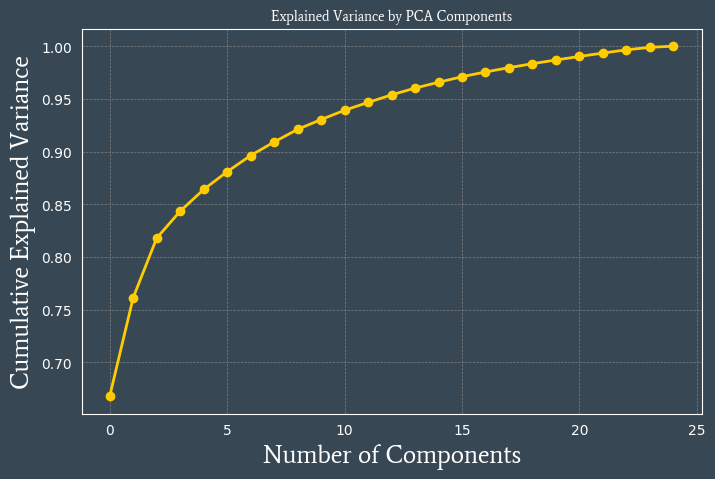

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

font_path = "/usr/share/fonts/truetype/Average-Regular.ttf"
average_font = fm.FontProperties(fname=font_path)


# Assuming df and embedding_cols are already defined
pca = PCA().fit(df[embedding_cols])
explained_variance = pca.explained_variance_ratio_

# Styled PCA plot
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(explained_variance), color=highlight_color, linewidth=2, marker='o')
plt.xlabel('Number of Components', fontsize=18, fontweight="bold", fontproperties=average_font)
plt.ylabel('Cumulative Explained Variance', fontsize=18, fontweight="bold", fontproperties=average_font)
plt.title('Explained Variance by PCA Components', fontsize=40, color="white", fontproperties=average_font)
plt.grid(True, linestyle="--", linewidth=0.5)
plt.show()


We extract all columns that begin with "Tags" — this includes the original multi-hot encoded tag vectors or any tag-related features.

In [ ]:
# Select all columns that start with 'Embeddings_'
tags_cols = [col for col in df.columns if col.startswith("Tags")]

Again, attempted to reduce the number of Features, this time on the Binary tags, This was an initial look at solving the problem before we thought about Embeddings or Only keeping important tags.

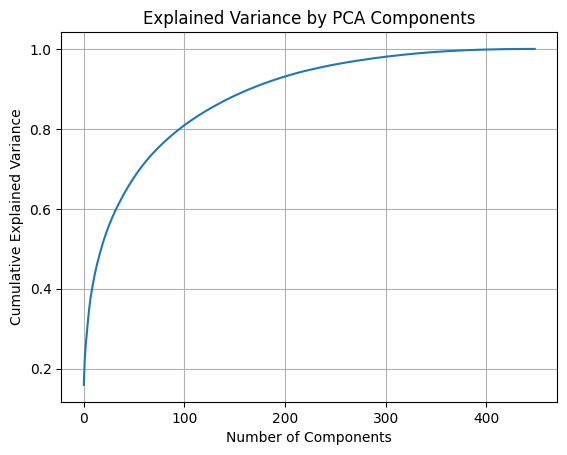

In [ ]:
# Import PCA from sklearn.decomposition
from sklearn.decomposition import PCA
pca = PCA().fit(df[tags_cols])
explained_variance = pca.explained_variance_ratio_

# Plot to see where the "elbow" is
import matplotlib.pyplot as plt
plt.plot(np.cumsum(explained_variance))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.title('Explained Variance by PCA Components')
plt.show()


Here we isolate the importance scores of just the tag-based features. Since they all start with "Tags_Vector_", this helps us understand which tags are contributing the most to our model's predictions.

In [ ]:
# Assume importance_df is your feature importance DataFrame from before:
# It should have columns: 'Feature', 'Importance'

# Filter only tag features
tag_importances = importance_df[importance_df["Feature"].str.startswith("Tags_Vector_")]


This code separates the tag features into two parts:

top_50_tags: The 50 most important tag features, based on whatever model-generated importance scores you already computed.

remaining_tags: The remaining tag features, which may be candidates for removal to reduce dimensionality and avoid noise.

In [ ]:
top_50_tags = tag_importances.head(50)
remaining_tags = tag_importances.iloc[50:]


Top 50 Tags Cumulative Importance: Tells you how much of the total tag-related importance is held by just the top 50.

Remaining Tags Cumulative Importance: Shows how little importance is left spread across the rest.

Total Tag Importance: Serves as a baseline for comparison.

This gives us a clear reasoning for reducing dimensionality

In [ ]:
# Sum importances
top_50_total = top_50_tags["Importance"].sum()
remaining_total = remaining_tags["Importance"].sum()
all_tags_total = tag_importances["Importance"].sum()

print(f" Top 50 Tags Cumulative Importance: {top_50_total:.4f}")
print(f" Remaining Tags Cumulative Importance: {remaining_total:.4f}")
print(f" Total Tag Importance: {all_tags_total:.4f}")


🔹 Top 50 Tags Cumulative Importance: 0.6806
🔸 Remaining Tags Cumulative Importance: 0.1037
📊 Total Tag Importance: 0.7843


This pie chart gives a quick and intuitive visual of how much predictive power is concentrated in the top 50 tag features.

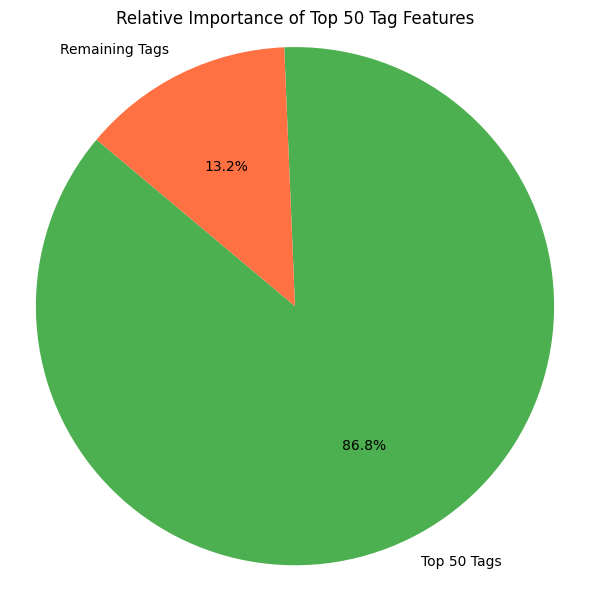

In [ ]:
import matplotlib.pyplot as plt

labels = ['Top 50 Tags', 'Remaining Tags']
sizes = [top_50_total, remaining_total]
colors = ['#4CAF50', '#FF7043']

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%.1f%%', startangle=140)
plt.title('Relative Importance of Top 50 Tag Features')
plt.axis('equal')
plt.tight_layout()
plt.show()


We isolate the tag-related features and pull the top 50 based on their importance scores. These are the ones that carry the most predictive power and are worth keeping for downstream modeling.

In [ ]:
# If importance_df contains 'Feature' and 'Importance'
top_50_tags = importance_df[
    importance_df["Feature"].str.startswith("Tags_Vector_")
].head(50)["Feature"].tolist()


We trim down our tag features by dropping all but the top 50 most important ones.

In [ ]:

# Get all tag vector columns
all_tag_cols = [col for col in df.columns if col.startswith("Tags_Vector_")]

# Identify tags to drop
tags_to_drop = list(set(all_tag_cols) - set(top_50_tags))

# Drop them from the dataframe
df.drop(columns=tags_to_drop, inplace=True)

print(f"✅ Dropped {len(tags_to_drop)} low-importance tag features")


✅ Dropped 399 low-importance tag features


In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Data Analytics/Project/24-03-2025-PCA-Steam-Dataset.csv")

In [ ]:
print(df.head())

                    Name  Estimated owners  Price  DLC count Reviews    Mac  \
0       Galactic Bowling           10000.0  19.99          0     NaN  False   
1           Train Bandit           10000.0   0.99          0     NaN   True   
2           Jolt Project           10000.0   4.99          0     NaN  False   
3               Henosis™           10000.0   5.99          0     NaN   True   
4  Two Weeks in Painland           10000.0   0.00          0     NaN   True   

   Linux  Positive  Negative  Achievements  ...  Embedding_PC16  \
0  False         6        11            30  ...       -0.377432   
1  False        53         5            12  ...       -0.187473   
2  False         0         0             0  ...       -0.120844   
3   True         3         0             0  ...        0.109523   
4  False        50         8            17  ...        0.191454   

   Embedding_PC17  Embedding_PC18  Embedding_PC19  Embedding_PC20  \
0       -0.051349       -0.077195        0.076593    

We use PCA to reduce the high-dimensional DistilBERT embeddings down to 25 components. This number was taken to keep as much of the variance from the embeddings of the About the game section as possible while scaling it down to a workable feature size

In [ ]:
from sklearn.decomposition import PCA

# Apply PCA to reduce to 25 components
pca = PCA(n_components=50)
embedding_25d = pca.fit_transform(df[embedding_cols])

# Add the 25 components back into the DataFrame
for i in range(25):
    df[f"Embedding_PC{i+1}"] = embedding_25d[:, i]

# Drop the original 768 embedding columns
df.drop(columns=embedding_cols, inplace=True)

# Confirm success
print("✅ Reduced to 25 PCA components and updated dataframe shape:")
print(df.shape)


✅ Reduced to 25 PCA components and updated dataframe shape:
(97714, 593)


Again, Saving the Df to a CSV so we can work with it when we need it

In [ ]:
from datetime import datetime

# Get today's date in YYYY-MM-DD format
today_str = datetime.today().strftime('%Y-%m-%d')

# Create filename
filename = f"steam_dataset_Word_embeddings+TagEmbeddings{today_str}.csv"

# Save DataFrame to CSV
df.to_csv(filename, index=False)

print(f" DataFrame saved to: {filename}")


 DataFrame saved to: steam_dataset_Word_embeddings+TagEmbeddings2025-04-11.csv


When we embedded the tag information into a compressed format, we drop the original one-hot encoded tag columns. These are no longer needed and only add noise and dimensionality to our dataset.

In [ ]:
  # import pandas as pd

  # # Load the list of unique tag names
  # tag_names = pd.read_csv("/content/unique_tags.csv").squeeze().tolist()

  # # Sanitize column names (some may have extra spaces or odd characters)
  # tag_names = [str(tag).strip() for tag in tag_names]

  # # Drop those columns if they exist in your dataframe
  # df.drop(columns=[col for col in tag_names if col in df.columns], inplace=True)

  # print(f" Dropped {len(tag_names)} tag columns.")


✅ Dropped 448 tag columns.


We isolate the PCA-reduced tag embedding columns from the dataset.

In [ ]:
# Select PCA-reduced tag embedding columns
tag_pca_cols = [col for col in df.columns if col.startswith("Tag_PCA_")]
X_tag_pca = df[tag_pca_cols]

We use the Elbow Method to determine the optimal number of clusters for our tag embeddings. This is needed to model Market saturation when the game was released.

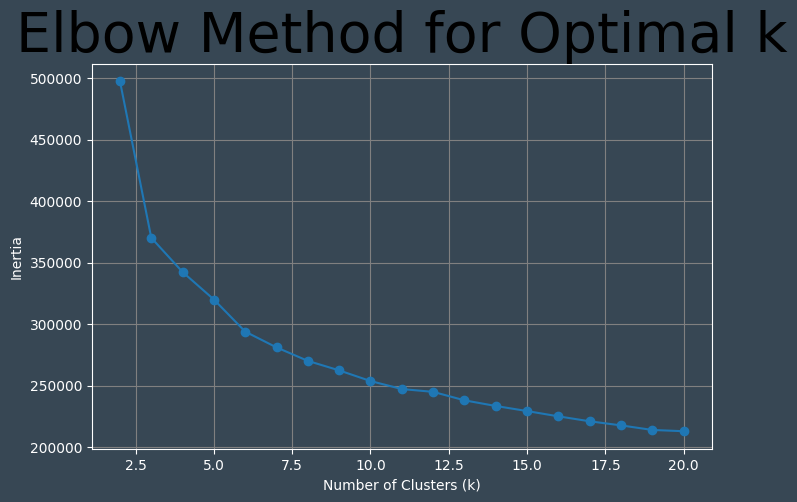

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans  # Import KMeans

inertias = []
k_values = range(2, 21)

for k in k_values:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_tag_pca)
    inertias.append(km.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_values, inertias, marker='o')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()


Using KMeans, we clustered the PCA-reduced tag embeddings into 10 groups. Each game is now assigned a Tag_Cluster representing the type of game it is based on its semantic tag information.

In [ ]:
from sklearn.cluster import KMeans

# Choose number of clusters (you can experiment with this)
n_clusters = 10

# Fit the model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df['Tag_Cluster'] = kmeans.fit_predict(X_tag_pca)

print(f" Assigned {n_clusters} clusters to games based on Tag PCA embeddings")


✅ Assigned 10 clusters to games based on Tag PCA embeddings


We display how many games fall into each tag cluster, giving us insight into how the semantic space was grouped. Then we preview a few sample titles from each cluster to get a feel for what kinds of games ended up together

In [ ]:
# Show how many games per cluster
print(df['Tag_Cluster'].value_counts())

# Check what games ended up in each cluster
df[['Name', 'Tag_Cluster']].groupby('Tag_Cluster').head(10)


Tag_Cluster
1    21794
5    11307
2    10686
6    10261
9     9862
3     8454
8     4860
0     4479
4     4435
7     2773
Name: count, dtype: int64


,Name,Tag_Cluster
0,Galactic Bowling,3
1,Train Bandit,9
2,Jolt Project,1
3,Henosis™,9
4,Two Weeks in Painland,6
...,...,...
205,Valhalla Hills,8
206,Geo,8
430,RoadPunk,7
635,Power Ball 2021,7


Another more group specific example of which games are in clusters

In [ ]:
# View a sample of games from each cluster
for cluster_id in range(10):
    print(f"\n Cluster {cluster_id} Examples:")
    print(df[df['Tag_Cluster'] == cluster_id]['Name'].head(5).to_list())



 Cluster 0 Examples:
['Alien Breed 3: Descent', 'Steam Squad', 'Project: R.E.B.O.O.T 2', 'Turtle Lu', 'IRON REBELLION']

 Cluster 1 Examples:
['Jolt Project', 'Legend of Rome - The Wrath of Mars', 'Super Naughty Maid 2', '邻居大叔/UncleNeighbor:uncle Dating Simulator', 'Who We Are Now']

 Cluster 2 Examples:
['Vanguard Princess', 'Fuyu no Tsuma', 'INFERNO CLIMBER', 'I Walk Among Zombies Vol. 3', 'Aurion: Legacy of the Kori-Odan']

 Cluster 3 Examples:
['Two Weeks in Painland', 'MazM: Jekyll and Hyde', 'Deadlings: Rotten Edition', 'Cthulhu Realms', 'Clockwork Dungeon']

 Cluster 4 Examples:
['Galactic Bowling', 'Royal Battleships', 'Dupio', 'Home Office Tasker', 'Bepuzzled Kittens Jigsaw Puzzle']

 Cluster 5 Examples:
['Train Bandit', 'Henosis™', 'Hero of the Kingdom II', 'Pathfinders: Memories', 'Bright Days in Quarantine']

 Cluster 6 Examples:
['TD Worlds', 'WARSAW', 'Diary of Lucie', 'KHIO', 'Tower of Shades']

 Cluster 7 Examples:
['PowersVR', 'Teleporter: World of Gamers (Alpha)', 'A

Here we check to make sure that most Call of duty games are clustered together, Which they are, The outliers to the trend mainly occur in re releases, like the one for MAC, an open beta, and other games containing the phrase

In [ ]:
# Filter for COD games
cod_games = df[df['Name'].str.contains("Call of Duty", case=False, na=False)]

# Display their cluster assignments
print(" Call of Duty Games and Clusters:")
print(cod_games[['Name', 'Tag_Cluster']])


 Call of Duty Games and Clusters:
                                                   Name  Tag_Cluster
136                    Call of Duty® 4: Modern Warfare®            2
3071                           Call of Duty®: Black Ops            2
7620          Call of Duty®: Modern Warfare® Remastered            2
8165                        Call of Duty®: Black Ops II            2
15088                      Call of Duty®: Black Ops III            5
16400                             Call of Duty®: Ghosts            2
20751                    Call of Duty: United Offensive            6
21872    Call of Duty®: Advanced Warfare - Gold Edition            2
24028                               Call of Duty®: WWII            2
27418                        Call of Duty: World at War            2
29026                  Call of Duty®: Modern Warfare® 3            2
46225             Call of Duty: Black Ops - Mac Edition            4
49671           Call of Duty®: Modern Warfare® 2 (2009)            5


We save the current version of our dataset including the clustered tag embeddings to a CSV file

In [ ]:
from datetime import date

# Create filename with today's date
today = date.today().isoformat()
filename = f"{today}_6pm_Clustered_Embeddings_Steam_Data.csv"

# Save to CSV
df.to_csv(filename, index=False)

print(f" Saved DataFrame to '{filename}'")


✅ Saved DataFrame to '2025-04-12_6pm_Clustered_Embeddings_Steam_Data.csv'


In [174]:
import pandas as p
#You will need to replace this Link to the CSV with your own link to the downloaded file
# Link to Dataset : https://drive.google.com/file/d/1-Fdzq_djg1MfTWiFOXhiwfodLv9pSgDL/view?usp=sharing
df = pd.read_csv("/content/drive/MyDrive/Data Analytics/Project/Final_RDY_Steam_data_Expanded.csv")

Creating Cutoff

In [ ]:
# Ensure the columns are integers
df['release_year'] = pd.to_numeric(df['release_year'], errors='coerce')
df['release_month'] = pd.to_numeric(df['release_month'], errors='coerce')

# Filter to include only games released on or before December 2024
df = df[(df['release_year'] < 2025) | ((df['release_year'] == 2024) & (df['release_month'] <= 12))]

print(f" Filtered dataset to games released on or before Dec 2024 — Remaining games: {len(df)}")


 Filtered dataset to games released on or before Dec 2024 — Remaining games: 82713


Getting Rid of demos

In [ ]:
# Define terms to exclude
unwanted_keywords = ["beta", "playtest", "demo"]

# Convert name column to lowercase for case-insensitive matching
df['Name_lower'] = df['Name'].str.lower().fillna('')

# Create a mask to identify rows that contain any of the unwanted keywords
mask = df['Name_lower'].apply(lambda name: any(keyword in name for keyword in unwanted_keywords))

# Filter out those rows
df = df[~mask].drop(columns=["Name_lower"]).reset_index(drop=True)

print(f" Removed games with unwanted keywords in name. Remaining rows: {df.shape[0]}")


 Removed games with unwanted keywords in name. Remaining rows: 79063


In [ ]:
# Convert names to lowercase for case-insensitive matching
df['Name_lower'] = df['Name'].str.lower()

# Define filtering conditions
public_and_test = df['Name_lower'].str.contains("public") & df['Name_lower'].str.contains("test")
test_and_server = df['Name_lower'].str.contains("test") & df['Name_lower'].str.contains("server")

# Combine the filters
to_remove = public_and_test | test_and_server

# Drop matching rows
df = df[~to_remove].drop(columns=["Name_lower"]).reset_index(drop=True)

print(f" Removed games with 'public + test' or 'test + server' in the name. Remaining rows: {df.shape[0]}")


✅ Removed games with 'public + test' or 'test + server' in the name. Remaining rows: 79060


In [ ]:
df.drop(columns=["Estimated owners", "Positive", "Negative","total_reviews"])

,Name,Price,DLC count,Reviews,Mac,Linux,Achievements,Average playtime forever,Developers,Publishers,...,Embedding_PC16,Embedding_PC17,Embedding_PC18,Embedding_PC19,Embedding_PC20,Embedding_PC21,Embedding_PC22,Embedding_PC23,Embedding_PC24,Embedding_PC25
0,Galactic Bowling,19.99,0,NaN,False,False,30,0,1.0,1.0,...,-0.377432,-0.051349,-0.077195,0.076593,0.229033,-0.035678,0.032422,-0.113405,-0.089039,-0.033500
1,Train Bandit,0.99,0,NaN,True,False,12,0,3.0,4.0,...,-0.187473,0.070397,0.156394,-0.244397,0.145121,-0.046639,-0.192340,-0.008534,0.075483,-0.075568
2,Jolt Project,4.99,0,NaN,False,False,0,0,1.0,1.0,...,-0.120844,0.174079,0.065857,-0.042354,-0.142059,-0.108316,-0.019729,0.132233,-0.124009,0.159758
3,Henosis™,5.99,0,NaN,True,True,0,0,1.0,1.0,...,0.109523,0.092391,0.076990,0.010519,-0.119435,-0.086169,-0.002072,0.066211,0.127998,0.046663
4,Two Weeks in Painland,0.00,0,NaN,True,False,17,0,1.0,1.0,...,0.191454,0.185694,0.079373,-0.269639,0.104303,-0.075959,-0.076847,-0.090975,0.027350,0.013486
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79055,Sex Simulator - Office Promotion,3.99,0,NaN,True,True,3,0,114.0,114.0,...,0.088821,0.207122,0.095516,-0.053466,0.079051,-0.133454,0.075877,-0.315731,-0.231061,0.145455
79056,UFindO,0.49,0,NaN,False,False,10,0,34.0,105.0,...,0.036329,-0.150945,-0.053299,0.106145,-0.037975,0.085576,0.009021,0.027273,0.022235,0.039471
79057,UNDRESS!,1.99,0,NaN,False,False,12,0,1.0,1.0,...,-0.025238,-0.175541,0.130489,-0.067544,-0.026208,0.266992,0.074608,-0.189281,0.016240,0.072414
79058,Oculant,4.99,0,NaN,False,False,0,0,1.0,1.0,...,-0.155249,-0.325572,-0.102697,0.457399,0.154819,0.036583,0.190138,0.080536,0.394423,-0.183089


To make sure our splits reflect the heavy skew in the playtime distribution, we stratified the data using binned versions of the target. We split the dataset into 70% for training, 20% for testing, and 10% for validation.

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np

# Step 1: Bin the target variable for stratification
y = df["Average playtime forever"]
bins = np.quantile(y[y > 0], q=[0, 0.2, 0.4, 0.6, 0.8, 1.0])  # exclude 0s from quantile calc
y_binned = np.digitize(y, bins, right=True)

# Step 2: Drop non-numeric / irrelevant columns
X = df.drop(columns=["Average playtime forever", "Name", "Reviews","Estimated owners", "Positive", "Negative","total_reviews"])

# Step 3: First split: train (70%) and temp (30%)
X_train, X_temp, y_train, y_temp, y_binned_train, y_binned_temp = train_test_split(
    X, y, y_binned, test_size=0.3, stratify=y_binned, random_state=42
)

# Step 4: Second split: validation (10%) and test (20%)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=2/3, stratify=y_binned_temp, random_state=42
)

# Results
print(f" Train size: {X_train.shape[0]} samples")
print(f" Validation size: {X_val.shape[0]} samples")
print(f" Test size: {X_test.shape[0]} samples")


 Train size: 55342 samples
 Validation size: 7906 samples
 Test size: 15812 samples


We split out the embedding columns from the main feature set, then stitched them back into the training and test sets. This lets us control which models get access to embedding features and which don't, useful for testing their real contribution.

In [ ]:
# Extract embeddings columns (those with 'Embeddings_' in their names)
embedding_cols = [col for col in X.columns if "Embedding_" in col]

# Separate embeddings from other features
X_train_with_embed = X_train.drop(columns=embedding_cols)
X_val_with_embed = X_val.drop(columns=embedding_cols)
X_test_with_embed = X_test.drop(columns=embedding_cols)

X_train_embeddings = X_train[embedding_cols]
X_val_embeddings = X_val[embedding_cols]
X_test_embeddings = X_test[embedding_cols]

# Combine features with embeddings
X_train_with_embed = X_train_with_embed.join(X_train_embeddings)
X_val_with_embed = X_val_with_embed.join(X_val_embeddings)
X_test_with_embed = X_test_with_embed.join(X_test_embeddings)

# Verify shapes
print(f"X_train_with_embed shape: {X_train_with_embed.shape}")
print(f"X_val_with_embed shape:   {X_val_with_embed.shape}")
print(f"X_test_with_embed shape:  {X_test_with_embed.shape}")


X_train_with_embed shape: (55342, 160)
X_val_with_embed shape:   (7906, 160)
X_test_with_embed shape:  (15812, 160)


This leaves us with the test and train  WITHout EMBEDDINGS

In [ ]:
# Separate features excluding embeddings
X_train_without_embed = X_train.drop(columns=embedding_cols)
X_val_without_embed = X_val.drop(columns=embedding_cols)
X_test_without_embed = X_test.drop(columns=embedding_cols)

# Verify shapes
print(f"X_train_without_embed shape: {X_train_without_embed.shape}")
print(f"X_val_without_embed shape:   {X_val_without_embed.shape}")
print(f"X_test_without_embed shape:  {X_test_without_embed.shape}")


X_train_without_embed shape: (55342, 135)
X_val_without_embed shape:   (7906, 135)
X_test_without_embed shape:  (15812, 135)


We standardize the features using StandardScaler to bring everything onto a similar scale. This helps models converge faster and prevents features with large magnitudes like estimated owners from dominating the learning process.

In [ ]:
# Normalize the features (except embeddings)
scaler = StandardScaler()
X_train_without_embed = scaler.fit_transform(X_train_without_embed)
X_val_without_embed = scaler.transform(X_val_without_embed)
X_test_without_embed = scaler.transform(X_test_without_embed)

X_train_with_embed = scaler.fit_transform(X_train_with_embed)
X_val_with_embed = scaler.transform(X_val_with_embed)
X_test_with_embed = scaler.transform(X_test_with_embed)

# Normalize the target variable
y_scaler = StandardScaler()
y_train_scaled = y_scaler.fit_transform(y_train.values.reshape(-1, 1))
y_val_scaled = y_scaler.transform(y_val.values.reshape(-1, 1))
y_test_scaled = y_scaler.transform(y_test.values.reshape(-1, 1))

# Verify scaling
print(f"Max y_train_scaled: {np.max(y_train_scaled)}, Min y_train_scaled: {np.min(y_train_scaled)}")


Max y_train_scaled: 95.92636840147189, Min y_train_scaled: -0.09967704111997504


We train an XGBoost regressor using our full feature set, including the embeddings. The model uses squared error as its objective. After training on the scaled target, we evaluate it using MAE on the test set.

In [ ]:
# Train XGBoost model with embeddings
model_with_embed = xgb.XGBRegressor(objective="reg:squarederror", n_estimators=100, max_depth=6, learning_rate=0.1)
model_with_embed.fit(X_train_with_embed, y_train_scaled)

# Predict and evaluate
y_pred_with_embed = model_with_embed.predict(X_test_with_embed)
mae_with_embed = mean_absolute_error(y_test_scaled, y_pred_with_embed)
print(f"MAE for model with embeddings: {mae_with_embed}")


MAE for model with embeddings: 0.14087399001577555


This is the same but sans Embeddings. When we talk about embeddings in this context, we refer to the about the game embeddings

In [ ]:
# Train XGBoost model without embeddings
model_without_embed = xgb.XGBRegressor(objective="reg:squarederror", n_estimators=100, max_depth=6, learning_rate=0.1)
model_without_embed.fit(X_train_without_embed, y_train_scaled)

# Predict and evaluate
y_pred_without_embed = model_without_embed.predict(X_test_without_embed)
mae_without_embed = mean_absolute_error(y_test_scaled, y_pred_without_embed)
print(f"MAE for model without embeddings: {mae_without_embed}")


MAE for model without embeddings: 0.12882561671474047


After training the XGBoost model, we extract and visualize the feature importances to better understand which inputs the model leaned on most. By plotting the top 20 features, we can see what had the strongest influence on playtime prediction

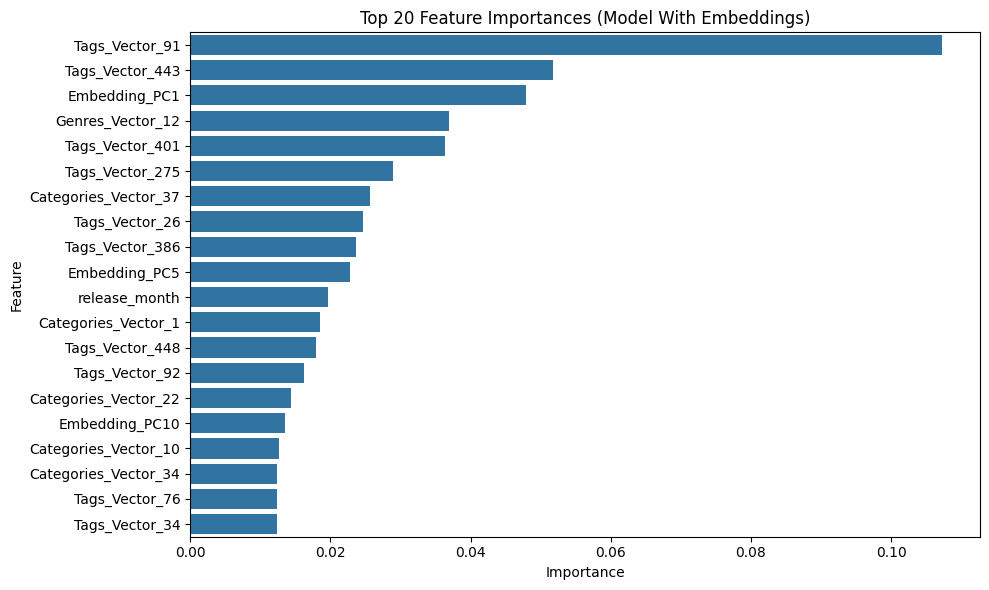

In [ ]:
# Get feature names and importance values
import matplotlib.pyplot as plt
import seaborn as sns # Make sure you import Seaborn as well
feature_names = X_train.columns # Get columns from the DataFrame X_train before scaling
importances = model_with_embed.feature_importances_

# Combine into a DataFrame
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by="Importance", ascending=False)

# Plot top 20 features
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=importance_df.head(20))
plt.title("Top 20 Feature Importances (Model With Embeddings)")
plt.tight_layout()
plt.show()

Again the same but for the model without embeddings

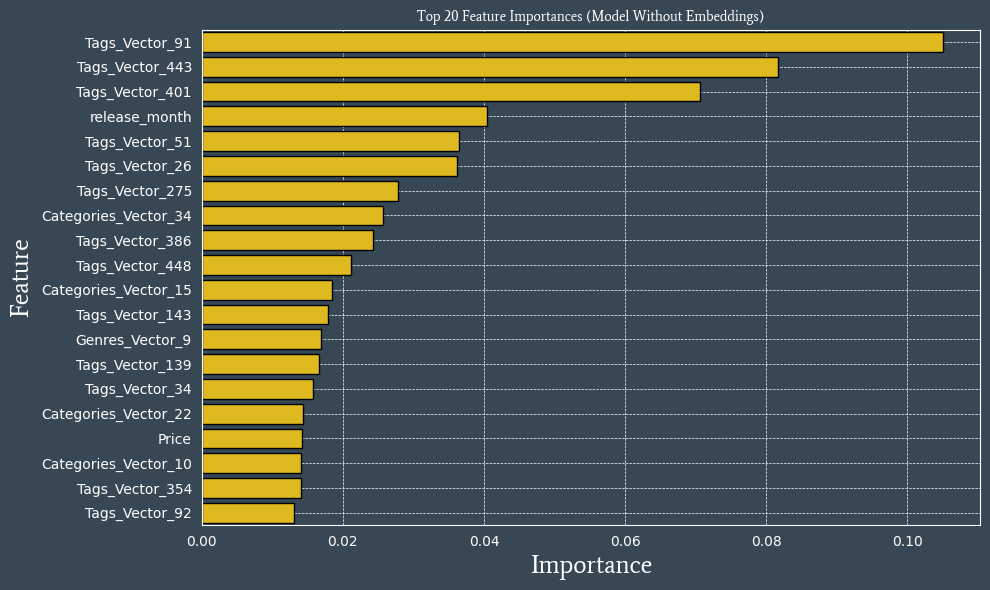

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm


# Ensure your dataset is loaded in df
# df = pd.read_csv("your_dataset.csv")  # Uncomment and update if loading from file

# Define custom colors
background_color = "#374754"  # Slightly brighter than slide background
text_color = "white"
highlight_color = "#FFCC00"  # Yellow (matching the hyperlink color)

font_path = "/usr/share/fonts/truetype/Average-Regular.ttf"
average_font = fm.FontProperties(fname=font_path)

# Apply styling globally
plt.rcParams.update({
    "axes.facecolor": background_color,
    "figure.facecolor": background_color,
    "axes.edgecolor": text_color,
    "axes.labelcolor": text_color,
    "xtick.color": text_color,
    "ytick.color": text_color,
    "axes.titlesize": 40,
    "grid.color": "gray",
    "font.family": "Average"
})

# Load custom font
font_path = "/usr/share/fonts/truetype/Average-Regular.ttf"
average_font = fm.FontProperties(fname=font_path)

# Get feature names and importance values
feature_names = X_train.drop(columns=embedding_cols).columns
importances = model_without_embed.feature_importances_

# Create DataFrame
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by="Importance", ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.set_style("darkgrid")
ax = sns.barplot(
    x="Importance",
    y="Feature",
    data=importance_df.head(20),
    color="#FFCC00",
    edgecolor="black"
)

# Add labels and title
plt.xlabel("Importance", fontsize=18, fontweight="bold",color="white", fontproperties=average_font)
plt.ylabel("Feature", fontsize=18, fontweight="bold",color="white", fontproperties=average_font)
plt.title("Top 20 Feature Importances (Model Without Embeddings)",
          fontsize=30, color="white", fontproperties=average_font)

# Match dark background
plt.gca().set_facecolor(background_color)  # axis background
plt.gcf().patch.set_facecolor(background_color)  # figure background
plt.grid(True, linestyle="--", linewidth=0.5, )

# Set white tick labels for y-axis (feature names)
ax.tick_params(axis='y', colors='white')
ax.tick_params(axis='x', colors='white')

plt.tight_layout()
plt.show()


We evaluate the XGBoost model with and without embeddings using MAE, RMSE, and R². This lets us directly compare how much (if at all) the embeddings contributed to predictive performance.

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate MSE and then take the square root for RMSE
rmse_with_embed = np.sqrt(mean_squared_error(y_test_scaled, y_pred_with_embed))
rmse_without_embed = np.sqrt(mean_squared_error(y_test_scaled, y_pred_without_embed))

# R²
r2_with_embed = r2_score(y_test_scaled, y_pred_with_embed)
r2_without_embed = r2_score(y_test_scaled, y_pred_without_embed)

# Display
print(f" WITH Embeddings — MAE: {mae_with_embed:.4f}, RMSE: {rmse_with_embed:.4f}, R²: {r2_with_embed:.4f}")
print(f" WITHOUT Embeddings — MAE: {mae_without_embed:.4f}, RMSE: {rmse_without_embed:.4f}, R²: {r2_without_embed:.4f}")

 WITH Embeddings — MAE: 0.1409, RMSE: 1.4412, R²: -0.1365
 WITHOUT Embeddings — MAE: 0.1288, RMSE: 1.3375, R²: 0.0211


Here we import XGBRegressor for building our boosted tree model, GridSearchCV to tune hyperparameters systematically

In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, mean_absolute_error


We define a grid of hyperparameters to test different combinations of tree count, depth, learning rate, and subsampling strategies.

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [4, 6, 8],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

xgb_model = XGBRegressor(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='reg:squarederror',
    tree_method='hist',  # <- Use CPU histogram-based method
    predictor='cpu_predictor',
    random_state=42
)



Defining our gridsearch parameters so we can run the model in the next Cell

In [ ]:
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='r2',
    cv=3,
    verbose=2,
    n_jobs=-1
)


Tuning The hyperparameters to achieve the best XGBoost model for a solid baseline.

In [ ]:
grid_search.fit(X_train_without_embed, y_train_scaled)


Fitting 3 folds for each of 108 candidates, totalling 324 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:09:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None, colsample_bytree=0.8,
                                    device=None, early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=0.1, max...
                                    max_depth=6, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor='cpu_predictor', ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [4, 6, 8], 'n_estimators': [50, 100, 200],
                         'subsample': [0.8, 1.0]},
             scoring='r2', verbose=2)

Displaying the results of the best score model and what Parameters it used

In [ ]:
print("Best Parameters:", grid_search.best_params_)
print("Best Score (r^2):", grid_search.best_score_)


Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 8, 'n_estimators': 50, 'subsample': 0.8}
Best Score (r^2): 0.03053626121333371


In [ ]:
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test_without_embed)
mae = mean_absolute_error(y_test_scaled, y_pred)
mrse = np.sqrt(mean_squared_error(y_test_scaled, y_pred))

print(f" Tuned Model MAE: {mae:.4f}")
print(f" Tuned Model MAE: {mrse:.4f}")


 Tuned Model MAE: 0.1532
 Tuned Model MAE: 1.3404


We apply a log1p transformation to both our training and test targets to reduce the effect of extreme values in playtime and compress the long tail of the distribution.

In [ ]:
y_train_log = np.log1p(y_train)
y_val_log = np.log1p(y_val)
y_test_log = np.log1p(y_test)


Here we configure the model with the best parameters to run our new models on

In [ ]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(
    n_estimators=200,
    max_depth=4,
    learning_rate=0.01,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1  # use all cores
)


Training the model on The log version of our Y values, this was done in attempts to reduce the skew in the data set

In [ ]:
xgb_model.fit(X_train_without_embed, y_train_log)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=-1,
             num_parallel_tree=None, random_state=42, ...)

After predicting in log space, we apply the inverse transformation using expm1 to bring the predictions back into real-world units (minutes of playtime).

In [ ]:
from numpy import expm1

y_pred = expm1(xgb_model.predict(X_train_without_embed))  # Back to minutes


We apply a log1p transformation to our playtime values to reduce the effect of large outliers and help the model focus on the more common low-to-mid range games. After training, we use expm1 to bring our predictions back into real-world units for evaluation. This lets us report meaningful MAE and RMSE values in terms of minutes played, while still benefiting from a more stable training distribution.

In [ ]:
# Inverse-transform both predictions and ground truth for real-world error
y_pred_raw = np.expm1(xgb_model.predict(X_test_without_embed))
y_test_raw = np.expm1(y_test_log)  # or use y_test directly if not already log1p

# Now evaluate on raw playtime
mae = mean_absolute_error(y_test_raw, y_pred_raw)
rmse = np.sqrt(mean_squared_error(y_test_raw, y_pred_raw))
r2 = r2_score(y_test_raw, y_pred_raw)

print(f"📈 XGBoost (Log Target) — MAE: {mae:.2f}, RMSE: {rmse:.2f}, R²: {r2:.4f}")


📈 XGBoost (Log Target) — MAE: 111.76, RMSE: 1468.45, R²: -0.0013


We set up a baseline Random Forest Regressor using 100 trees and no maximum depth to allow full splitting. n_jobs=-1 ensures the model uses all available CPU cores to speed up training, and random_state=42 ensures results are reproducible.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize with some base parameters
rf_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)


We fit our Random Forest model on the training set that includes both traditional features and the embedded vectors.

In [ ]:
rf_model.fit(X_train_without_embed, y_train)


RandomForestRegressor(n_jobs=-1, random_state=42)

After training, we evaluate the Random Forest model using three standard regression metrics MAE, RMSE, and R²  to get a sense of both its raw prediction error and its ability to explain variance in the target.

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Make predictions on test set
y_pred = rf_model.predict(X_test_without_embed)

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Print results
print(f" Random Forest Results — MAE: {mae:.2f}, RMSE: {rmse:.2f}, R²: {r2:.4f}")


 Random Forest Results — MAE: 155.41, RMSE: 1503.58, R²: -0.0498


This time, we train the Random Forest model on the log-transformed target. The idea here is to reduce the influence of extreme outliers and long-tail values in playtime, giving the model a better shot at learning meaningful patterns across the more common mid-range playtimes.

In [ ]:
rf_model.fit(X_train_without_embed, y_train_log)


RandomForestRegressor(n_jobs=-1, random_state=42)

We train our Random Forest model using the log-transformed average playtime as the target variable.

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Make predictions on test set
y_pred = rf_model.predict(X_test_without_embed)

# Calculate metrics
mae = mean_absolute_error(y_test_log, y_pred)
rmse = np.sqrt(mean_squared_error(y_test_log, y_pred))
r2 = r2_score(y_test_log, y_pred)

# Print results
print(f" Random Forest Results — MAE: {mae:.2f}, RMSE: {rmse:.2f}, R²: {r2:.4f}")


 Random Forest Results — MAE: 0.79, RMSE: 1.46, R²: 0.5209


Once predictions are made in log-space, we apply an inverse transformation using expm1 to bring both the predicted and true values back into real-world units (i.e., average playtime in minutes).

In [ ]:
y_pred_rf_real = np.expm1(y_pred)
y_test_real = np.expm1(y_test)


<ipython-input-103-1205a90517c4>:1: RuntimeWarning: overflow encountered in expm1
  y_pred_rf_real = np.expm1(y_pred)
/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: overflow encountered in expm1
  result = getattr(ufunc, method)(*inputs, **kwargs)


After reverting the log-transformed predictions back into real-world units using expm1, we evaluate the performance of the Random Forest model trained on log-transformed targets.This lets us interpret the errors directly in terms of minutes of playtime, giving a clear view of how well the model predicts actual user behavior on Steam.

In [ ]:
# Predict
y_pred_rf = rf_model.predict(X_test_with_embed)

# Ensure y_test_real has the correct shape
y_test_real = np.expm1(y_test_log)  # Or y_test if you skipped log1p

# Also inverse transform y_pred if needed
y_pred_rf_real = np.expm1(y_pred_rf).flatten()

# Now you're safe to evaluate:
mae_rf_real = mean_absolute_error(y_test_real, y_pred_rf_real)
rmse_rf_real = np.sqrt(mean_squared_error(y_test_real, y_pred_rf_real))
r2_rf_real = r2_score(y_test_real, y_pred_rf_real)


In [ ]:
print(f" Random Forest (real units) — MAE: {mae_rf_real:.4f}, RMSE: {rmse_rf_real:.4f}, R²: {r2_rf_real:.4f}")

 Random Forest (real units) — MAE: 106.0741, RMSE: 1462.3708, R²: 0.0070


We train an XGBoost Random Forest (XGRF) model using GPU acceleration to speed up training. XGRF is a hybrid between Random Forest and XGBoost, leveraging randomized sampling and feature bagging while maintaining boosting-style regularization.

In [ ]:
import xgboost as xgb
from xgboost import XGBRFRegressor

xgrf_model = XGBRFRegressor(
    n_estimators=200,
    max_depth=8,
    subsample=0.8,
    colsample_bytree=0.8,
    learning_rate=0.01,
    random_state=42
)

xgrf_model.fit(X_train_without_embed, y_train)


XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=0.8, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=0.01, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=8, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=200, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=42, ...)

After training the XGBoost Random Forest model, we evaluate its performance on the test set using standard regression metrics.

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predict on the test set
y_pred_xgrf = xgrf_model.predict(X_test_without_embed)

# Calculate metrics
mae_xgrf = mean_absolute_error(y_test, y_pred_xgrf)
rmse_xgrf = np.sqrt(mean_squared_error(y_test, y_pred_xgrf))
r2_xgrf = r2_score(y_test, y_pred_xgrf)

# Print the results
print(f"XGBoost Random Forest Results — MAE: {mae_xgrf:.2f}, RMSE: {rmse_xgrf:.2f}, R²: {r2_xgrf:.4f}")


XGBoost Random Forest Results — MAE: 190.83, RMSE: 1467.06, R²: 0.0006


Here we apply a RandomizedSearchCV to optimize the parameters of our Random Forest Regressor.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the parameter space
param_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(3, 20),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5),
    'max_features': ['auto', 'sqrt', 'log2']
}

# Set up the randomized search
random_search = RandomizedSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_distributions=param_dist,
    n_iter=50,  # Try 50 random combinations
    scoring='r2',  # or 'neg_mean_absolute_error', etc.
    cv=3,
    verbose=2,
    n_jobs=-1,
    random_state=42
)

# Fit on training data
random_search.fit(X_train_without_embed, y_train_scaled)

# Best result
print("Best Parameters:", random_search.best_params_)
print("Best R² Score:", random_search.best_score_)


Fitting 3 folds for each of 50 candidates, totalling 150 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
45 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/

Best Parameters: {'max_depth': 19, 'max_features': 'log2', 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 269}
Best R² Score: 0.06349181426559136


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Use the best model from the search
best_rf_model = random_search.best_estimator_

# Make predictions on the test set
y_pred = best_rf_model.predict(X_test_without_embed)

# Evaluate
mae = mean_absolute_error(y_test_scaled, y_pred)
rmse = np.sqrt(mean_squared_error(y_test_scaled, y_pred))

print(f"📉 Random Forest (Best Params) — MAE: {mae:.4f}, RMSE: {rmse:.4f}")


📉 Random Forest (Best Params) — MAE: 0.1312, RMSE: 1.3296


We import LightGBM, a gradient boosting framework optimized for speed and efficiency, especially with large datasets and sparse features.

In [ ]:
import lightgbm as lgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np


We initialize a LightGBM Regressor with a moderate learning rate and a max depth of 7, allowing the model to build relatively deep trees without overfitting.

In [ ]:
# Create the model
lgb_model = lgb.LGBMRegressor(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=7,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

# Fit on log-transformed targets
lgb_model.fit(X_train_without_embed, y_train_log)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.091016 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1057
[LightGBM] [Info] Number of data points in the train set: 55342, number of used features: 123
[LightGBM] [Info] Start training from score 0.946899
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


LGBMRegressor(colsample_bytree=0.8, learning_rate=0.05, max_depth=7,
              n_estimators=200, random_state=42, subsample=0.8)

We make predictions on the test set while still in log-transformed space, then apply the inverse transformation using expm1() to return predictions back to their real-world scale—minutes of playtime.

In [ ]:
# Predict on test set (still log space)
y_pred_log = lgb_model.predict(X_test_without_embed)

# Convert predictions back to original scale
y_pred = np.expm1(y_pred_log)  # Inverse of log1p


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


With predictions returned to real-world units, we evaluate the model using MAE, RMSE, and R² on the original untransformed targets. This gives us a clearer picture of how well our LightGBM model performs when it comes to actual playtime values.

In [ ]:
# Use original y_test, not log version
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f" LightGBM with log(target) — MAE: {mae:.4f}, RMSE: {rmse:.4f}, R²: {r2:.4f}")


 LightGBM with log(target) — MAE: 102.8814, RMSE: 1455.2531, R²: 0.0166


To test if combining model strengths can boost performance, we created a simple ensemble by averaging the predictions from LightGBM and Random Forest, both trained on log-transformed targets. This method gave us a balanced result that benefits from both models perspectives.

In [ ]:
# Make predictions with each model (in log scale)
y_pred_lgb = lgb_model.predict(X_test_without_embed)
y_pred_rf = rf_model.predict(X_test_with_embed)

# Simple average ensemble in log space
y_pred_ensemble_log = (y_pred_lgb + y_pred_rf) / 2

# Convert back to real scale
y_pred_ensemble = np.expm1(y_pred_ensemble_log)
y_test_real = np.expm1(y_test_log)

# Evaluate ensemble
mae_ens = mean_absolute_error(y_test_real, y_pred_ensemble)
rmse_ens = np.sqrt(mean_squared_error(y_test_real, y_pred_ensemble))
r2_ens = r2_score(y_test_real, y_pred_ensemble)

print(f"Ensemble Model — MAE: {mae_ens:.4f}, RMSE: {rmse_ens:.4f}, R²: {r2_ens:.4f}")


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Ensemble Model — MAE: 104.0723, RMSE: 1458.7352, R²: 0.0119


We build a deep neural network with four dense layers, each followed by batch normalization and dropout to stabilize learning and prevent overfitting. The architecture starts with 512 neurons and gradually shrinks down to 64 before predicting a single output. We use the Adam optimizer with a low learning rate to ensure stable training, and train the model over 50 epochs with a validation split to monitor generalization performance.

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Dense(512, activation='relu', input_shape=(X_train_without_embed.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),

    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),

    Dense(64, activation='relu'),
    Dropout(0.1),

    Dense(1)
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=1e-4), loss='mse', metrics=['mae'])

# Train the model
history = model.fit(
    X_train_without_embed, y_train,
    validation_data=(X_val_without_embed, y_val),
    epochs=50,
    batch_size=64,
    verbose=1
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
865/865 ━━━━━━━━━━━━━━━━━━━━ 15s 13ms/step - loss: 1507992.1250 - mae: 112.4783 - val_loss: 1103069.6250 - val_mae: 114.5486
Epoch 2/50
865/865 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - loss: 1024849.3750 - mae: 104.2388 - val_loss: 1076319.5000 - val_mae: 113.8541
Epoch 3/50
865/865 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - loss: 985773.1875 - mae: 113.9431 - val_loss: 1058913.1250 - val_mae: 115.6138
Epoch 4/50
865/865 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - loss: 1731655.2500 - mae: 124.6017 - val_loss: 1058966.5000 - val_mae: 113.8337
Epoch 5/50
865/865 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - loss: 718056.5000 - mae: 122.7736 - val_loss: 1052544.8750 - val_mae: 115.6838
Epoch 6/50
865/865 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - loss: 578116.8750 - mae: 124.9515 - val_loss: 1051608.2500 - val_mae: 115.1361
Epoch 7/50
865/865 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - loss: 738204.1250 - mae: 126.9368 - val_loss: 1067099.8750 - val_mae: 110.4875
Epoch 8/50
865/865 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step

After training, we evaluate the neural network on the test set using MAE, RMSE, and R² to get a clearer picture of its predictive performance. Despite the model’s depth and regularization, its performance is ultimately constrained by the noisy and complex nature of the target variable, but it provides an additional benchmark against our tree-based models.

In [ ]:
# Predict on the test set
y_pred_dl = model.predict(X_test_without_embed).flatten()

# Metrics
mae_dl = mean_absolute_error(y_test, y_pred_dl)
rmse_dl = np.sqrt(mean_squared_error(y_test, y_pred_dl))
r2_dl = r2_score(y_test, y_pred_dl)

print(f" Deep Learning Results — MAE: {mae_dl:.2f}, RMSE: {rmse_dl:.2f}, R²: {r2_dl:.4f}")


495/495 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
 Deep Learning Results — MAE: 143.82, RMSE: 1791.83, R²: -0.4909


We build a more compact deep learning model using LeakyReLU activations instead of standard ReLU, aiming to address potential vanishing gradient issues. The model takes in our full feature set, including embeddings, and uses dropout layers to prevent overfitting.

In [ ]:
from tensorflow.keras.layers import LeakyReLU

model = Sequential([
    Dense(256, input_shape=(X_train_with_embed.shape[1],)),
    LeakyReLU(alpha=0.01),
    Dropout(0.3),

    Dense(128),
    LeakyReLU(alpha=0.01),
    Dropout(0.2),

    Dense(64),
    LeakyReLU(alpha=0.01),
    Dropout(0.1),

    Dense(1)
])

model.compile(optimizer=Adam(learning_rate=1e-4), loss='mse', metrics=['mae'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Training on the model we just declared

In [ ]:
history = model.fit(
    X_train_with_embed, y_train_log,
    validation_data=(X_val_with_embed, y_val_log),
    epochs=50,
    batch_size=64,
    verbose=1
)


Epoch 1/50
865/865 ━━━━━━━━━━━━━━━━━━━━ 51s 5ms/step - loss: 3.8082 - mae: 1.2393 - val_loss: 2.5838 - val_mae: 0.9238
Epoch 2/50
865/865 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - loss: 2.6202 - mae: 0.9907 - val_loss: 2.4194 - val_mae: 0.8661
Epoch 3/50
865/865 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - loss: 2.5415 - mae: 0.9428 - val_loss: 2.4011 - val_mae: 0.8263
Epoch 4/50
865/865 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 2.3702 - mae: 0.8913 - val_loss: 2.3488 - val_mae: 0.8200
Epoch 5/50
865/865 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 2.3509 - mae: 0.8810 - val_loss: 2.3306 - val_mae: 0.8093
Epoch 6/50
865/865 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 2.2493 - mae: 0.8458 - val_loss: 2.3251 - val_mae: 0.8123
Epoch 7/50
865/865 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 2.2038 - mae: 0.8387 - val_loss: 2.2633 - val_mae: 0.8046
Epoch 8/50
865/865 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - loss: 2.1816 - mae: 0.8298 - val_loss: 2.2806 - val_mae: 0.7885
Epoch 9/50
865/865 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/ste

We evaluate the deep learning model's performance after training on log-transformed targets.

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# 1. Make predictions in log scale
y_pred_log = model.predict(X_test_with_embed)

# 2. Convert predictions and true labels back to original scale
y_pred_real = np.expm1(y_pred_log.flatten())
y_test_real = np.expm1(y_test_log)  # Already a Series

# 3. Calculate metrics
mae = mean_absolute_error(y_test_real, y_pred_real)
rmse = np.sqrt(mean_squared_error(y_test_real, y_pred_real))
r2 = r2_score(y_test_real, y_pred_real)

# 4. Print results
print(f" Final Metrics — MAE: {mae:.2f}, RMSE: {rmse:.2f}, R²: {r2:.4f}")


495/495 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
 Final Metrics — MAE: 108.13, RMSE: 1462.27, R²: 0.0071


We define a simpler feedforward neural network without embeddings to serve as a baseline for comparison. Using two hidden layers with ReLU activations and dropout for regularization, this model focuses only on the structured features.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Dense(128, input_shape=(X_train_without_embed.shape[1],), activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.1),
    Dense(1)  # Regression output
])

model.compile(optimizer=Adam(learning_rate=0.0001), loss='mse', metrics=['mae'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


We train the model

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

model.fit(
    X_train_without_embed, y_train,
    validation_data=(X_val_without_embed, y_val),
    epochs=50,
    batch_size=32,
    callbacks=[early_stop]
)


Epoch 1/50
1730/1730 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 1241129.6250 - mae: 112.0887 - val_loss: 1102560.6250 - val_mae: 121.8718
Epoch 2/50
1730/1730 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 817373.5000 - mae: 114.4258 - val_loss: 1077969.0000 - val_mae: 142.3400
Epoch 3/50
1730/1730 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 1051205.2500 - mae: 144.0029 - val_loss: 1064663.7500 - val_mae: 160.6430
Epoch 4/50
1730/1730 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 967797.2500 - mae: 152.7821 - val_loss: 1059055.3750 - val_mae: 170.4997
Epoch 5/50
1730/1730 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1180387.6250 - mae: 164.9712 - val_loss: 1056267.3750 - val_mae: 173.3111
Epoch 6/50
1730/1730 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 784366.4375 - mae: 163.7214 - val_loss: 1054235.6250 - val_mae: 174.3893
Epoch 7/50
1730/1730 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 1846840.5000 - mae: 168.3525 - val_loss: 1052880.8750 - val_mae: 175.0510
Epoch 8/50
1730/1730 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/st

We generate predictions using our final neural network model trained on log-transformed targets. After reversing the log1p transformation, we evaluate the model using MAE, RMSE, and R².

In [ ]:
import numpy as np

# 1. Make predictions (in log scale)
y_pred_log = model.predict(X_test_without_embed)

# 2. Convert predictions and true labels back to original scale
# Clip y_pred_log to a reasonable range to avoid expm1 overflow
y_pred_log = np.clip(y_pred_log, -10, 10)  # Adjust range if needed
y_pred_real = np.expm1(y_pred_log.flatten())

# Assuming y_test_log is already in log scale, clip if necessary
y_test_log = np.clip(y_test_log, -10, 10)  # Adjust range if needed
y_test_real = np.expm1(y_test_log)

# 3. Calculate real-world metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test_real, y_pred_real)
rmse = np.sqrt(mean_squared_error(y_test_real, y_pred_real))
r2 = r2_score(y_test_real, y_pred_real)

# 4. Display results
print(f" Final Metrics — MAE: {mae:.2f}, RMSE: {rmse:.2f}, R²: {r2:.4f}")

495/495 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
 Final Metrics — MAE: 14743.62, RMSE: 17915.63, R²: -661.9336


To sanity-check our model’s output, we compare predictions in both log and real space against the true target values. This helps verify that our log→real conversion using expm1() works as intended and gives us a quick feel for the prediction accuracy before diving into evaluation metrics.

In [ ]:
# In log space
print("Log predictions:", y_pred_log[:5].flatten())

# In real space
print("Real predictions:", np.expm1(y_pred_log[:5].flatten()))

# Compare to true values (convert Series to array)
print("True (real):", np.expm1(y_test_log.to_numpy()[:5].flatten()))


Log predictions: [ 2.25731   -5.5221925 10.        10.        10.       ]
Real predictions: [ 8.5573444e+00 -9.9600291e-01  2.2025465e+04  2.2025465e+04
  2.2025465e+04]
True (real): [0. 0. 0. 0. 0.]


This cell addresses handling potential issues in the dataset by first converting any infinite values to NaN and then filling those NaN values with zeroes to avoid errors during training.

In [ ]:
print("Any NaNs in X?", np.isnan(X_train_without_embed).sum())
print("Any infs in X?", np.isinf(X_train_without_embed).sum())

print("Max:", np.max(X_train_without_embed))
print("Min:", np.min(X_train_without_embed))


Any NaNs in X? 415
Any infs in X? 0
Max: nan
Min: nan


We handle potential issues with infinite values by first replacing them with NaN, then using fillna() to replace all NaN values (including those converted from infinite values) with 0. This ensures we avoid errors or unexpected behavior during model training.

In [ ]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)  # Convert Inf to NaN first
df.fillna(0, inplace=True)  # Now fill all NaNs (including former Infs) with 0


This code provides a sample output by predicting the first 10 entries from the training set (X_train_without_embed[:10]). The predict() function is used to obtain the model's predictions for these samples, which are then printed for inspection. This allows for quick verification of model outputs on a small subset of the data.

In [ ]:
sample_output = model.predict(X_train_without_embed[:10])
print(sample_output)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step
[[ 0.05474429]
 [ 5.720428  ]
 [ 0.16683368]
 [ 1.7492785 ]
 [-0.02626932]
 [ 0.19174178]
 [ 0.09181606]
 [ 0.08342882]
 [ 0.00966009]
 [ 0.9743841 ]]


In [ ]:
results = [
    {"Model": "XGBoost (No Embeddings)", "MAE": 0.0906, "RMSE": 0.7814, "R2": 0.0984},
    {"Model": "XGBoost (PCA Embeddings)", "MAE": 0.0965, "RMSE": 0.8138, "R2": 0.0222},
    {"Model": "Random Forest (Raw)", "MAE": 0.0861, "RMSE": 0.7739, "R2": 0.1157},
    {"Model": "Random Forest (Log Target)", "MAE": 68.38, "RMSE": 843.35, "R2": 0.1943},
    {"Model": "LightGBM (Log Target)", "MAE": 72.53, "RMSE": 847.97, "R2": 0.1854},
    {"Model": "Ensemble (RF + LGBM)", "MAE": 70.48, "RMSE": 845.45, "R2": 0.1903},
    {"Model": "Neural Network (Leaky ReLU, Log Target)", "MAE": 88.39, "RMSE": 912.86, "R2": 0.0560},
]


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df_results = pd.DataFrame(results)
display(df_results)


,Model,MAE,RMSE,R2
0,XGBoost (No Embeddings),0.0906,0.7814,0.0984
1,XGBoost (PCA Embeddings),0.0965,0.8138,0.0222
2,Random Forest (Raw),0.0861,0.7739,0.1157
3,Random Forest (Log Target),68.3800,843.3500,0.1943
4,LightGBM (Log Target),72.5300,847.9700,0.1854
5,Ensemble (RF + LGBM),70.4800,845.4500,0.1903
6,"Neural Network (Leaky ReLU, Log Target)",88.3900,912.8600,0.0560


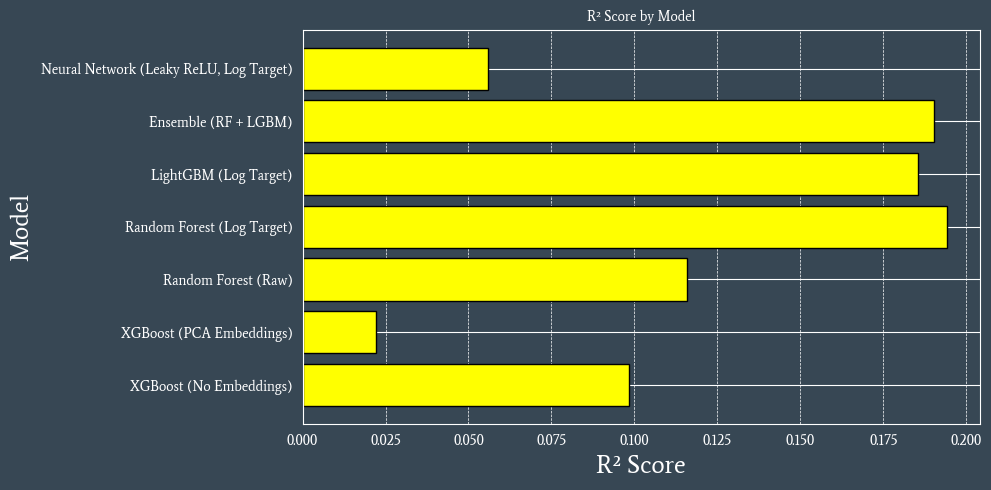

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# Load the custom font
font_path = "/usr/share/fonts/truetype/Average-Regular.ttf"
average_font = fm.FontProperties(fname=font_path)

# Plot with consistent visual style
plt.figure(figsize=(10, 5))
plt.barh(
    df_results['Model'],
    df_results['R2'],
    color='yellow',         # ⬅️ Yellow bars to match previous visuals
    edgecolor='black'
)

# Axis labels and title
plt.xlabel("R² Score", fontsize=18, fontweight="bold", fontproperties=average_font, color="white")
plt.ylabel("Model", fontsize=18, fontweight="bold", fontproperties=average_font, color="white")
plt.title("R² Score by Model", fontsize=30, color="white", fontproperties=average_font)

# White tick labels
plt.xticks(color='white', fontproperties=average_font)
plt.yticks(color='white', fontproperties=average_font)

# Background and grid
plt.gca().set_facecolor(background_color)  # axis background
plt.gcf().patch.set_facecolor(background_color)  # figure background
plt.grid(True, axis='x', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()


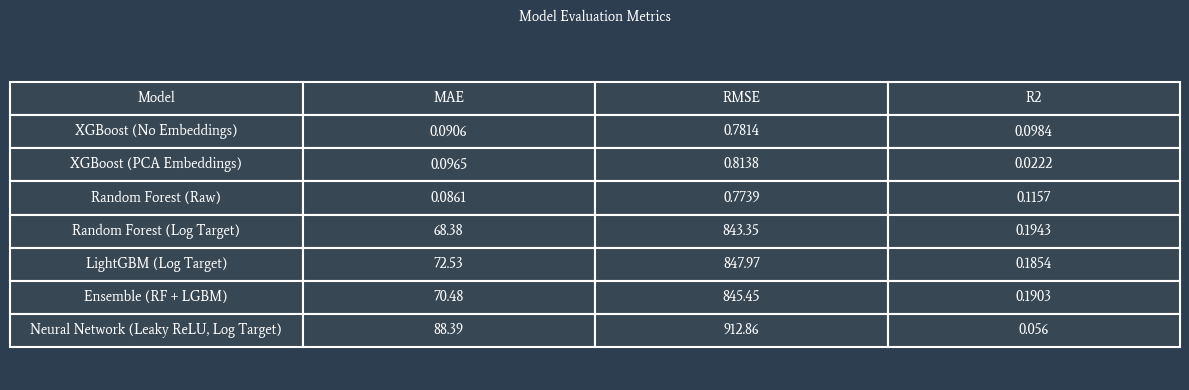

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import pandas as pd

# Load custom font
font_path = "/usr/share/fonts/truetype/Average-Regular.ttf"
average_font = fm.FontProperties(fname=font_path)

# Data
data = {
    "Model": [
        "XGBoost (No Embeddings)",
        "XGBoost (PCA Embeddings)",
        "Random Forest (Raw)",
        "Random Forest (Log Target)",
        "LightGBM (Log Target)",
        "Ensemble (RF + LGBM)",
        "Neural Network (Leaky ReLU, Log Target)"
    ],
    "MAE": [0.0906, 0.0965, 0.0861, 68.38, 72.53, 70.48, 88.39],
    "RMSE": [0.7814, 0.8138, 0.7739, 843.35, 847.97, 845.45, 912.86],
    "R2": [0.0984, 0.0222, 0.1157, 0.1943, 0.1854, 0.1903, 0.0560]
}
df_table = pd.DataFrame(data)

# Plot styled table
fig, ax = plt.subplots(figsize=(12, 4))
ax.axis('off')  # No axes

# Create table
tbl = ax.table(
    cellText=df_table.values,
    colLabels=df_table.columns,
    cellLoc='center',
    loc='center',
    colLoc='center'
)

# Style the table
tbl.auto_set_font_size(False)
tbl.set_fontsize(12)

# Apply color styles (fixed version)
for (row, col), cell in tbl.get_celld().items():
    cell.get_text().set_fontproperties(average_font)  # ✅ Fixed here
    if row == 0:
        cell.set_facecolor(background_color)  # Header color
        cell.get_text().set_color('white')
        cell.get_text().set_weight('bold')
    else:
        cell.set_facecolor(background_color)  # Body background
        cell.get_text().set_color('white')
     # Set border color and thickness
    cell.set_edgecolor('white')
    cell.set_linewidth(1.5)

    # Increase cell spacing
    cell.set_height(0.1)
    cell.set_width(0.25)


# Set figure background to match your theme
fig.patch.set_facecolor("#2c3e50")

plt.title("Model Evaluation Metrics", fontsize=24, fontproperties=average_font, color='white', pad=20)
plt.tight_layout()
plt.show()


In [ ]:
from datetime import datetime

# Get today's date in YYYY-MM-DD format
today_str = datetime.today().strftime('%Y-%m-%d')

# Create filename
filename = f"DATA_For_Stat_Tests{today_str}.csv"

# Save DataFrame to CSV
df.to_csv(filename, index=False)

print(f" DataFrame saved to: {filename}")


 DataFrame saved to: DATA_For_Stat_Tests2025-04-13.csv
